Project Title : Seoul Bike Sharing Demand Prediction
Problem Description
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
Data Description
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Attribute Information:
Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files  # if using Google Colab
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [13]:
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')


In [26]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [27]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [29]:
df.shape

(8760, 14)

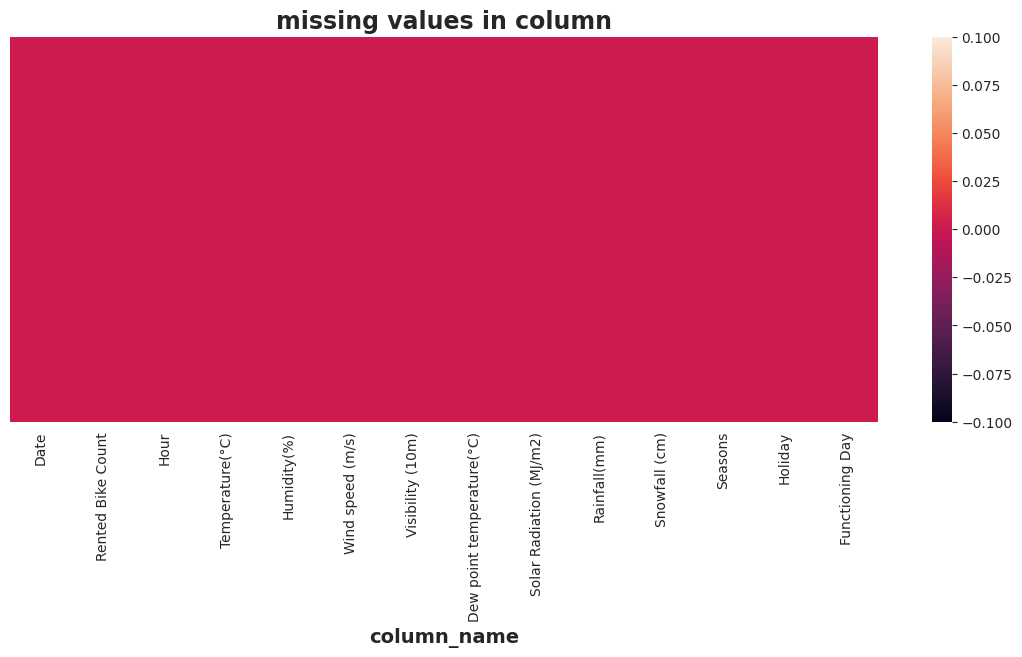

In [30]:
import matplotlib.pyplot as plt
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [31]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [32]:
df.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [33]:
# Date columns to Date format conversion
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)


In [34]:
print(df.columns)
print(df.head(2).to_dict())

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')
{'Date': {0: Timestamp('2017-12-01 00:00:00'), 1: Timestamp('2017-12-01 00:00:00')}, 'Rented Bike Count': {0: 254, 1: 204}, 'Hour': {0: 0, 1: 1}, 'Temperature(°C)': {0: -5.2, 1: -5.5}, 'Humidity(%)': {0: 37, 1: 38}, 'Wind speed (m/s)': {0: 2.2, 1: 0.8}, 'Visibility (10m)': {0: 2000, 1: 2000}, 'Dew point temperature(°C)': {0: -17.6, 1: -17.6}, 'Solar Radiation (MJ/m2)': {0: 0.0, 1: 0.0}, 'Rainfall(mm)': {0: 0.0, 1: 0.0}, 'Snowfall (cm)': {0: 0.0, 1: 0.0}, 'Seasons': {0: 'Winter', 1: 'Winter'}, 'Holiday': {0: 'No Holiday', 1: 'No Holiday'}, 'Functioning Day': {0: 'Yes', 1: 'Yes'}}


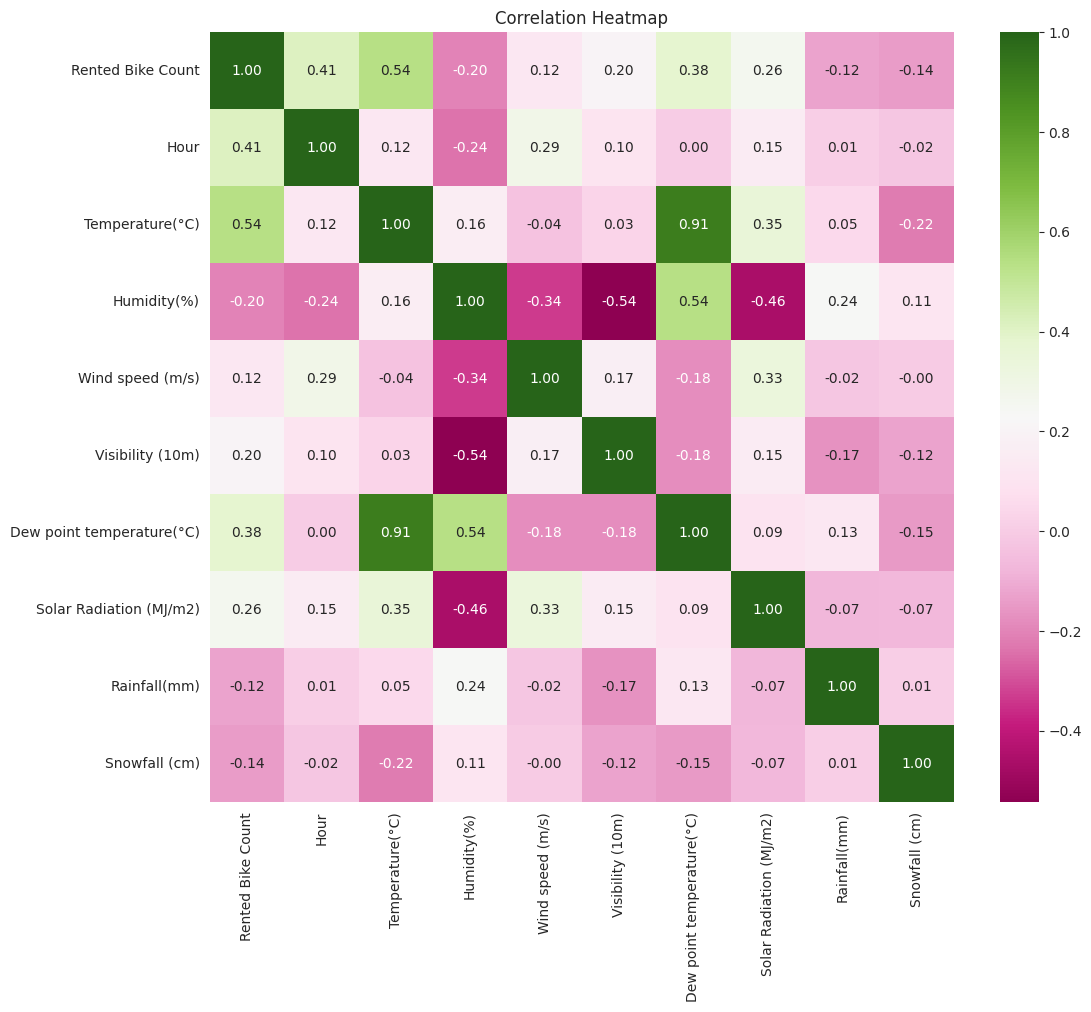

In [35]:
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='PiYG', annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  #Calculating VIF
  vif =pd.DataFrame()
  vif["variables"]= X.columns
  vif["VIF"]= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)


In [44]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

variables       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

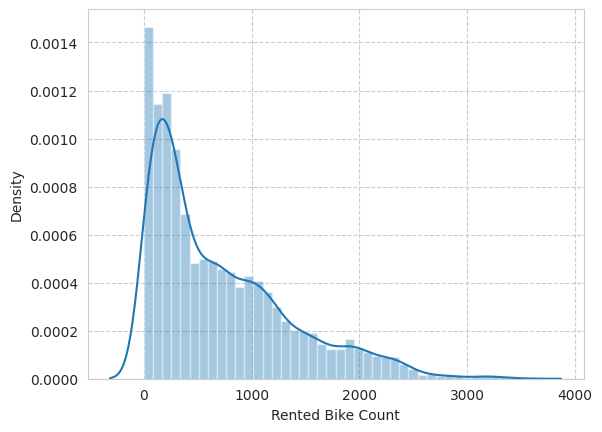

In [ ]:
sns.distplot(df['Rented Bike Count'])

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

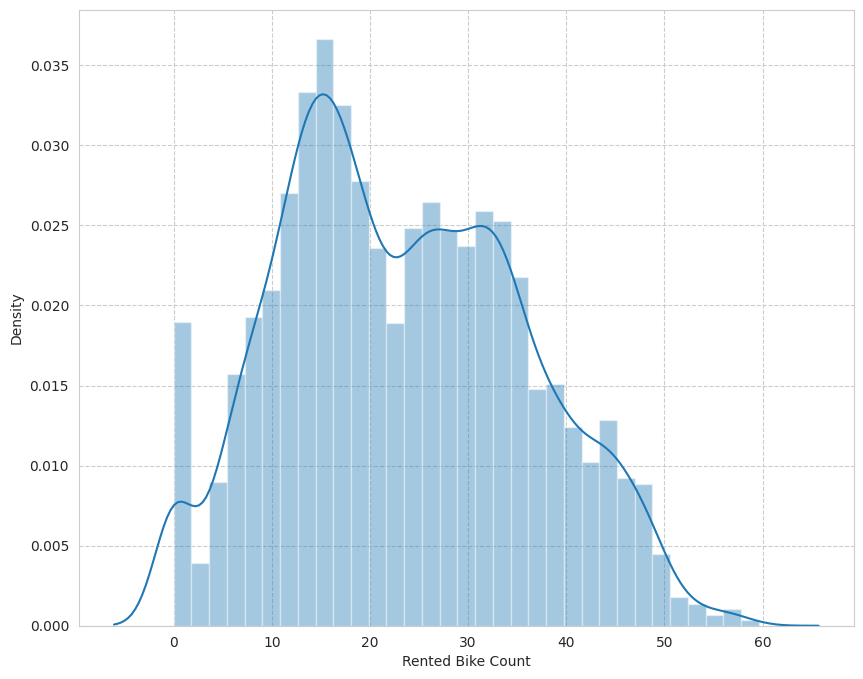

In [21]:
#square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']))

In [18]:
numeric_features = df.select_dtypes(exclude='object')

In [47]:
#Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [15]:
#describing numeric feature

numeric_features.describe().transpose()

count                           mean  \
Date                         8760  2018-05-31 23:59:59.999999744   
Rented Bike Count          8760.0                     704.602055   
Hour                       8760.0                           11.5   
Temperature(°C)            8760.0                      12.882922   
Humidity(%)                8760.0                      58.226256   
Wind speed (m/s)           8760.0                       1.724909   
Visibility (10m)           8760.0                    1436.825799   
Dew point temperature(°C)  8760.0                       4.073813   
Solar Radiation (MJ/m2)    8760.0                       0.569111   
Rainfall(mm)               8760.0                       0.148687   
Snowfall (cm)              8760.0                       0.075068   

                                           min                  25%  \
Date                       2017-12-01 00:00:00  2018-03-02 00:00:00   
Rented Bike Count                          0.0                191.0   
Hour                                       0.0                 5.75   
Temperature(°C)                          -17.8                  3.5   
Humidity(%)                                0.0                 42.0   
Wind speed (m/s)                           0.0                  0.9   
Visibility (10m)                          27.0                940.0   
Dew point temperature(°C)                -30.6                 -4.7   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   

                                           50%                  75%  \
Date                       2018-06-01 00:00:00  2018-08-31 00:00:00   
Rented Bike Count                        504.5              1065.25   
Hour                                      11.5                17.25   
Temperature(°C)                           13.7                 22.5   
Humidity(%)                               57.0                 74.0   
Wind speed (m/s)                           1.5                  2.3   
Visibility (10m)                        1698.0               2000.0   
Dew point temperature(°C)                  5.1                 14.8   
Solar Radiation (MJ/m2)                   0.01                 0.93   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   

                                           max         std  
Date                       2018-11-30 00:00:00         NaN  
Rented Bike Count                       3556.0  644.997468  
Hour                                      23.0    6.922582  
Temperature(°C)                           39.4   11.944825  
Humidity(%)                               98.0   20.362413  
Wind speed (m/s)                           7.4      1.0363  
Visibility (10m)                        2000.0  608.298712  
Dew point temperature(°C)                 27.2   13.060369  
Solar Radiation (MJ/m2)                   3.52    0.868746  
Rainfall(mm)                              35.0    1.128193  
Snowfall (cm)                              8.8    0.436746

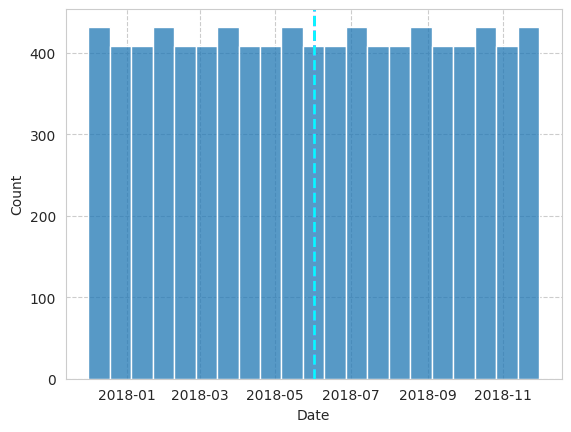

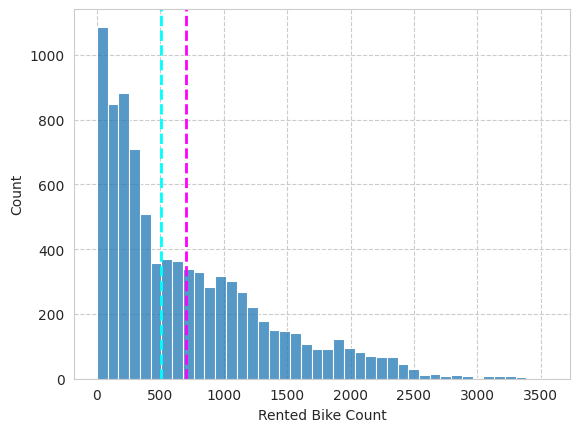

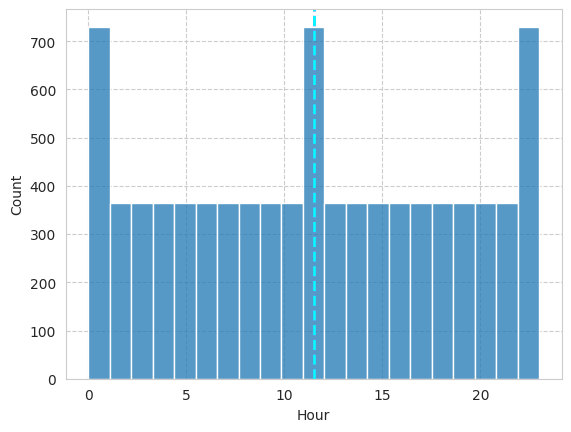

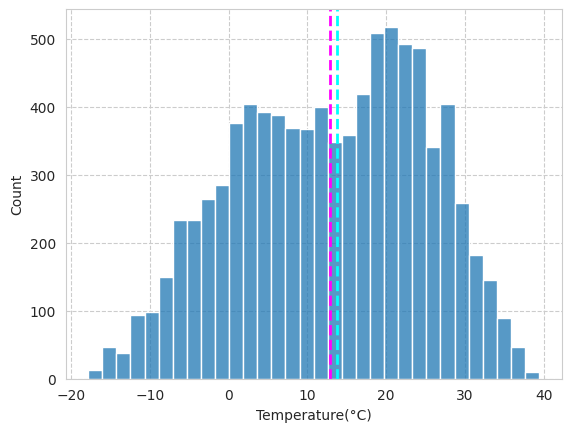

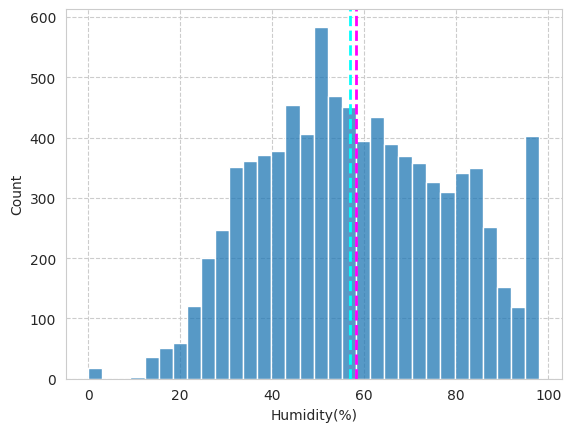

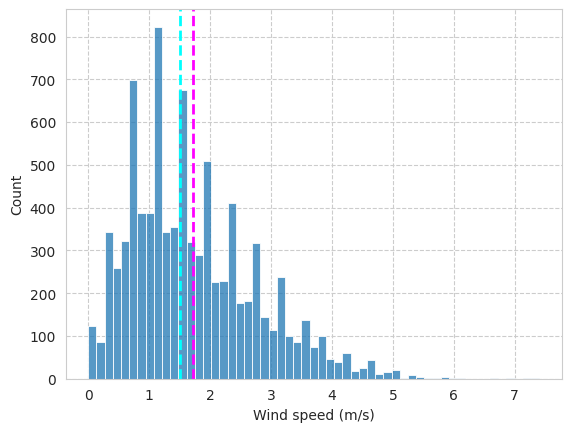

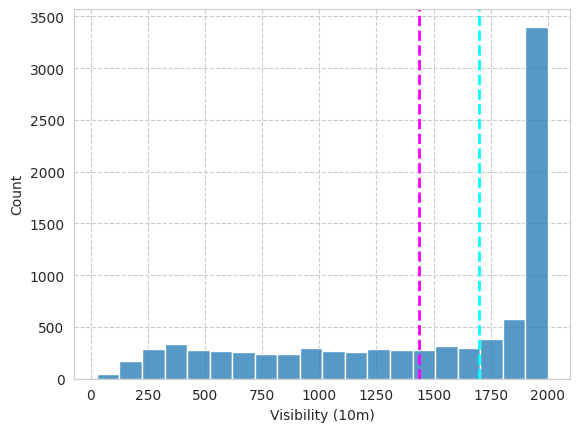

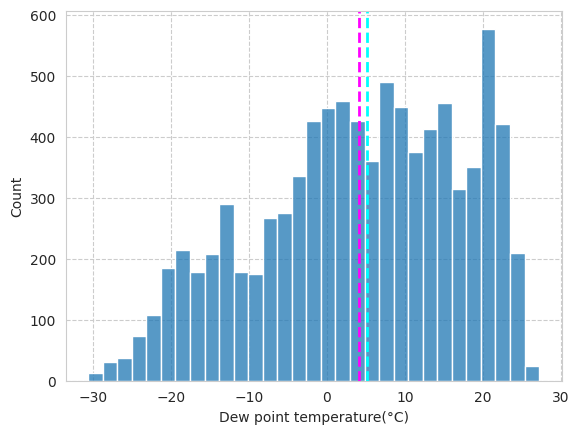

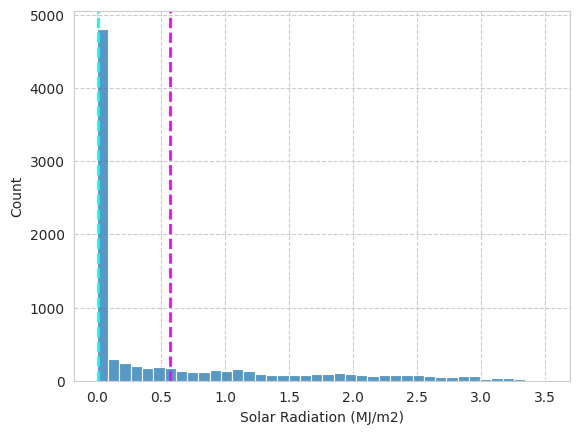

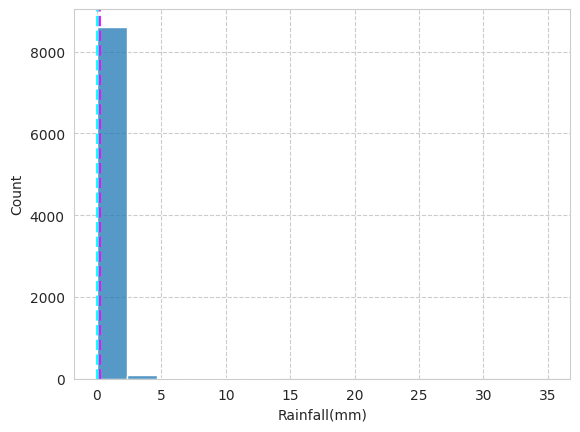

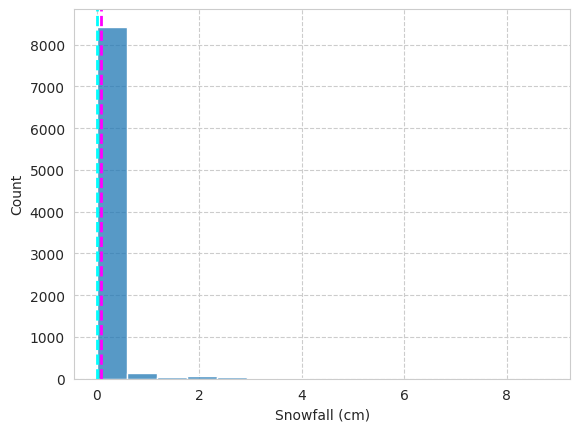

In [19]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(),color='magenta',linestyle='dashed',linewidth=2)
  plt.axvline(df[col].median(),color='cyan',linestyle='dashed',linewidth=2)
  plt.show()


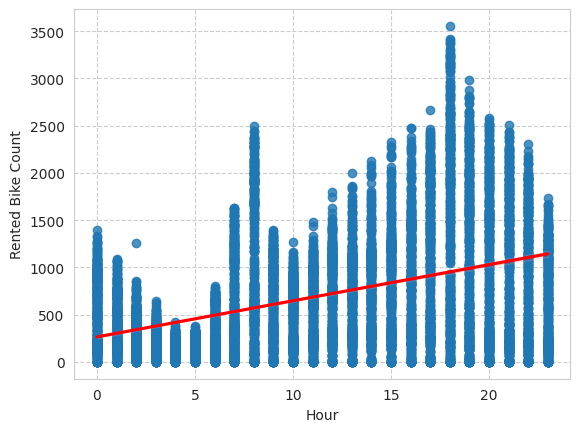

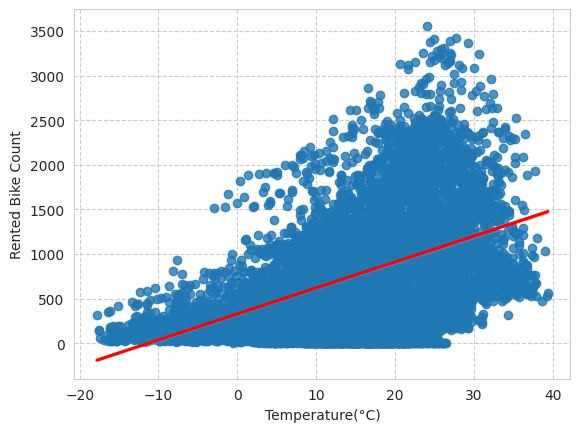

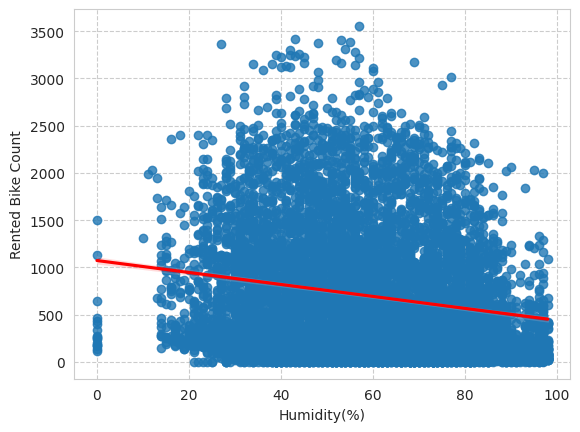

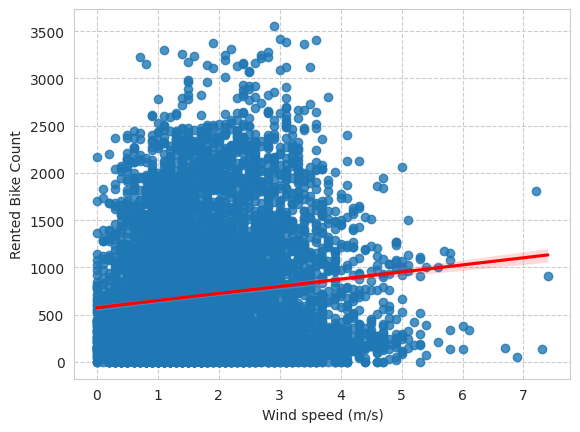

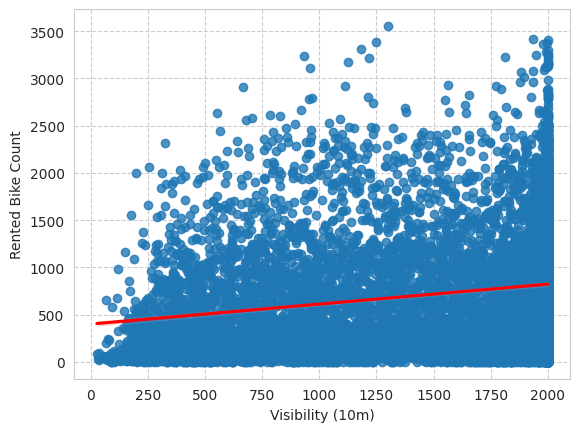

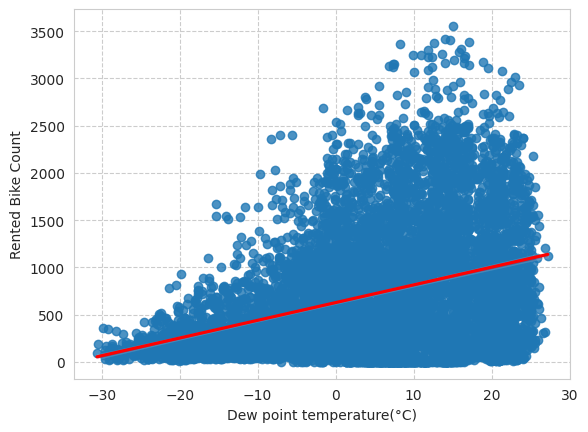

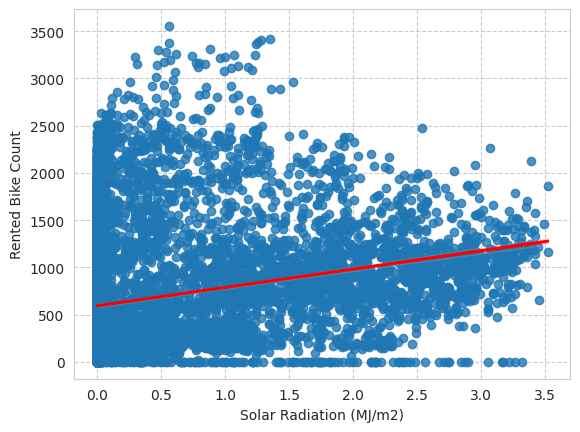

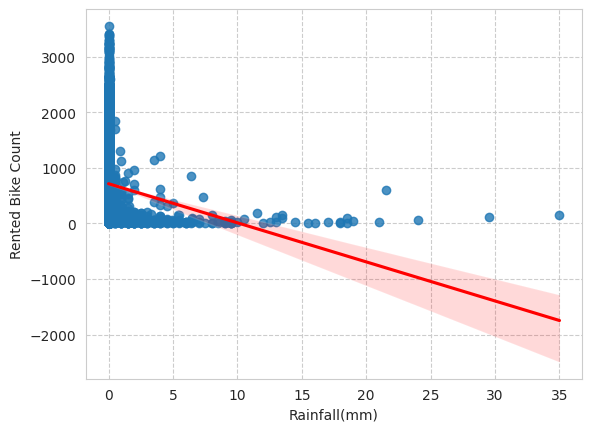

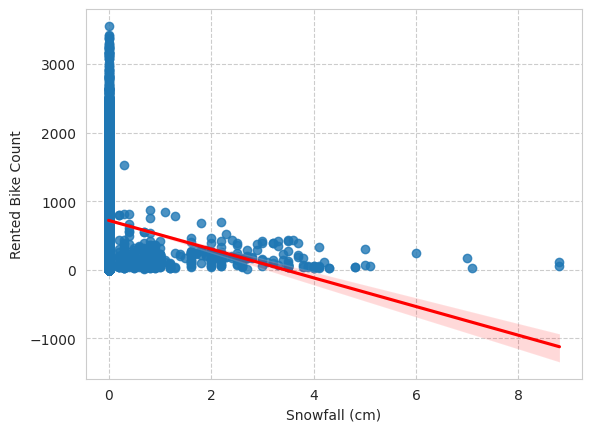

In [48]:

# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})

  plt.show()

In [14]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [12]:
categorical_features

Date Seasons     Holiday Functioning Day
0     01/12/2017  Winter  No Holiday             Yes
1     01/12/2017  Winter  No Holiday             Yes
2     01/12/2017  Winter  No Holiday             Yes
3     01/12/2017  Winter  No Holiday             Yes
4     01/12/2017  Winter  No Holiday             Yes
...          ...     ...         ...             ...
8755  30/11/2018  Autumn  No Holiday             Yes
8756  30/11/2018  Autumn  No Holiday             Yes
8757  30/11/2018  Autumn  No Holiday             Yes
8758  30/11/2018  Autumn  No Holiday             Yes
8759  30/11/2018  Autumn  No Holiday             Yes

[8760 rows x 4 columns]

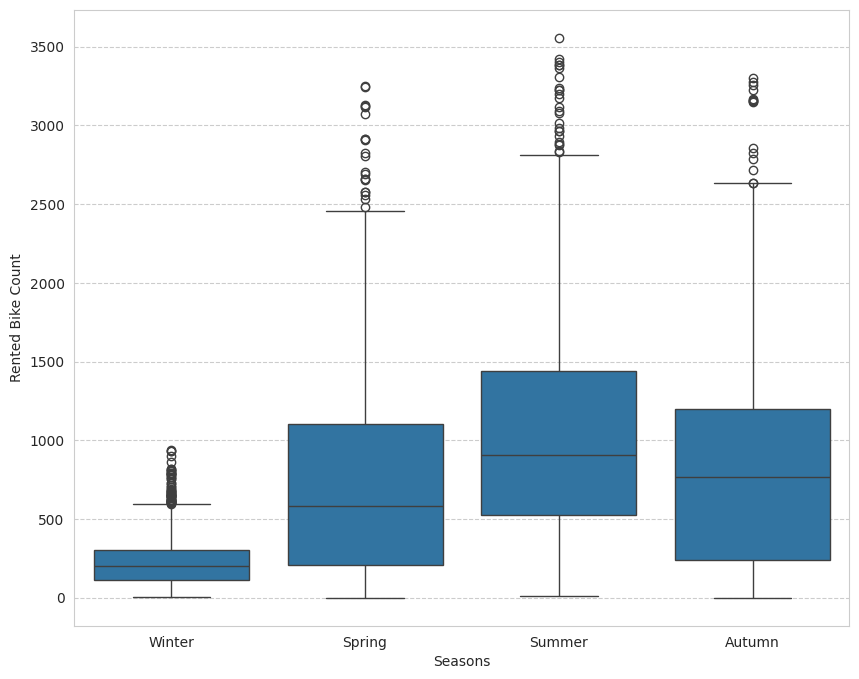

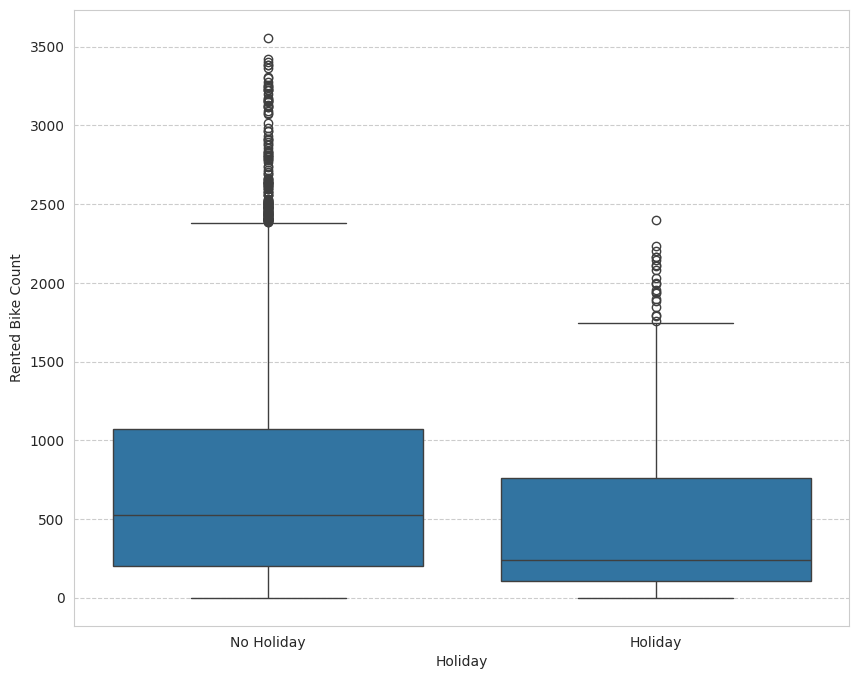

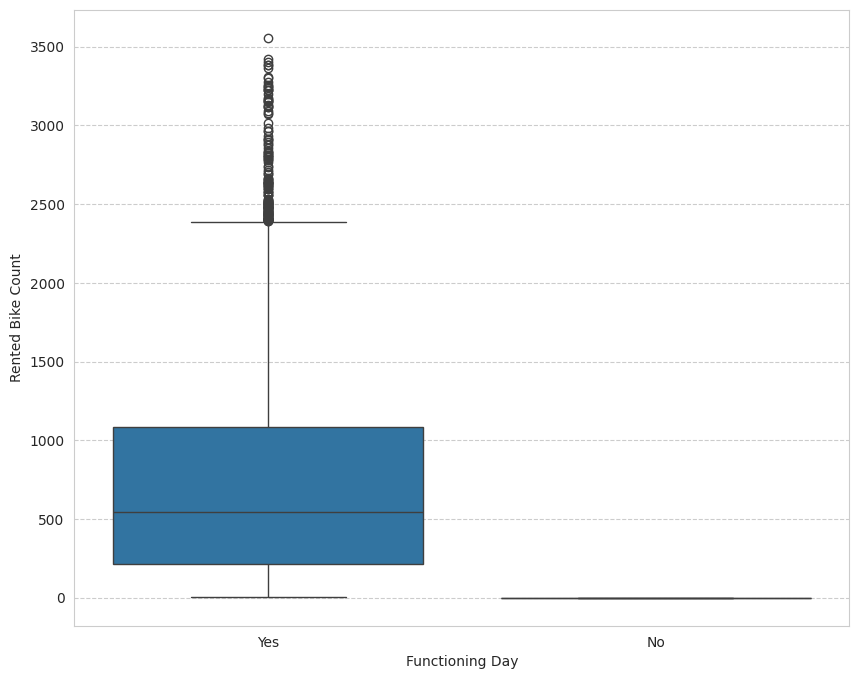

In [49]:
#ploting Box plot to visulaize and trying to get information from plot

for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

Conclusion

*   Slightly Higher demand during Non Holidays
*   Less Demand on Winter Seasons


*   Almost no demand on non functioning day






In [17]:
#checking counts of functioning day
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

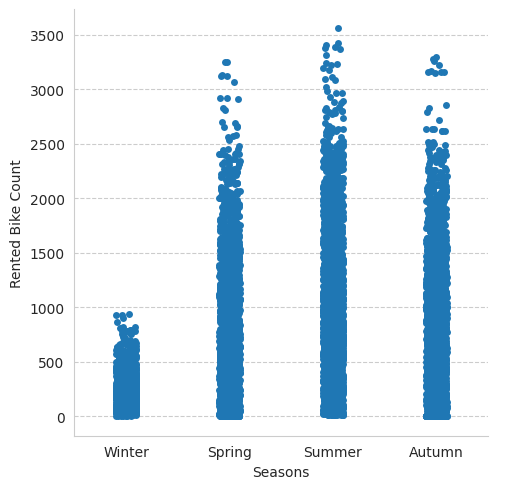

In [18]:
#ploting cat for more understanding
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

Conclusion

we can clearly see that demand less for Bikes in Winter

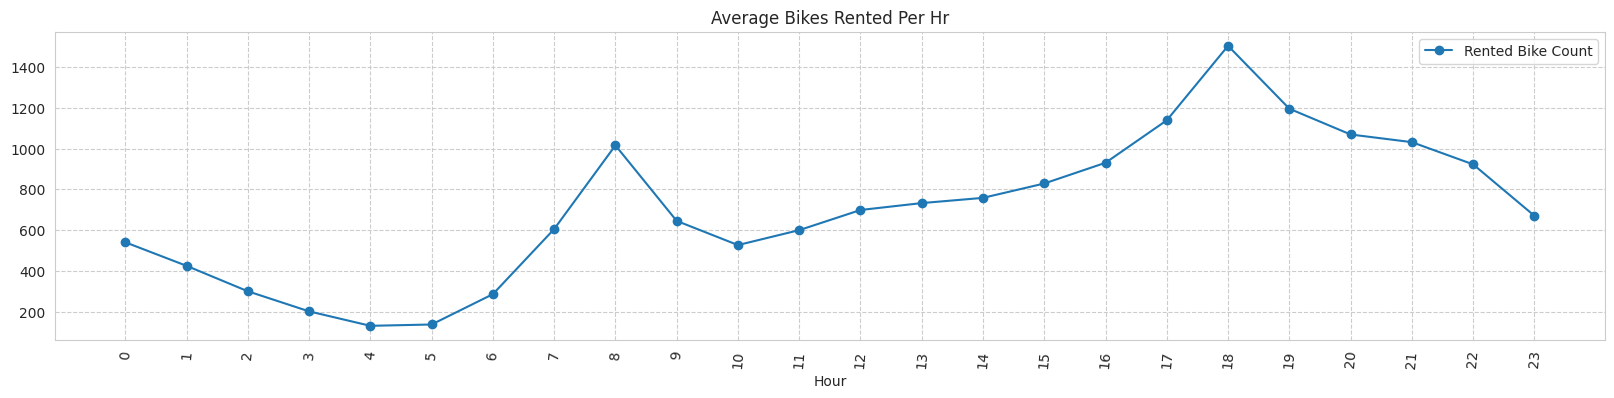

In [22]:
#ploting line graph
#group by hrs and get average bike rented and percentage change

avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

#plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a= avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(),rotation=85);

Conclusion

High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand

In [15]:
#creating Dummy variable for categorical columns
dummy_categorical_feature=pd.get_dummies(categorical_features,drop_first=True)

In [17]:
dummy_categorical_feature

Date_01/02/2018  Date_01/03/2018  Date_01/04/2018  Date_01/05/2018  \
0               False            False            False            False   
1               False            False            False            False   
2               False            False            False            False   
3               False            False            False            False   
4               False            False            False            False   
...               ...              ...              ...              ...   
8755            False            False            False            False   
8756            False            False            False            False   
8757            False            False            False            False   
8758            False            False            False            False   
8759            False            False            False            False   

      Date_01/06/2018  Date_01/07/2018  Date_01/08/2018  Date_01/09/2018  \
0               False            False            False            False   
1               False            False            False            False   
2               False            False            False            False   
3               False            False            False            False   
4               False            False            False            False   
...               ...              ...              ...              ...   
8755            False            False            False            False   
8756            False            False            False            False   
8757            False            False            False            False   
8758            False            False            False            False   
8759            False            False            False            False   

      Date_01/10/2018  Date_01/11/2018  ...  Date_31/05/2018  Date_31/07/2018  \
0               False            False  ...            False            False   
1               False            False  ...            False            False   
2               False            False  ...            False            False   
3               False            False  ...            False            False   
4               False            False  ...            False            False   
...               ...              ...  ...              ...              ...   
8755            False            False  ...            False            False   
8756            False            False  ...            False            False   
8757            False            False  ...            False            False   
8758            False            False  ...            False            False   
8759            False            False  ...            False            False   

      Date_31/08/2018  Date_31/10/2018  Date_31/12/2017  Seasons_Spring  \
0               False            False            False           False   
1               False            False            False           False   
2               False            False            False           False   
3               False            False            False           False   
4               False            False            False           False   
...               ...              ...              ...             ...   
8755            False            False            False           False   
8756            False            False            False           False   
8757            False            False            False           False   
8758            False            False            False           False   
8759            False            False            False           False   

      Seasons_Summer  Seasons_Winter  Holiday_No Holiday  Functioning Day_Yes  
0              False            True                True                 True  
1              False            True                True                 True  
2              False            True                True          

In [19]:
#concating numeric columns and dummy columns and creating final df
final_df=pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [53]:
#showing head of final df
final_df.head()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0           False           False            True                True   
1           False           False            True                True   
2           False           False            True                True   
3           False           False            True                True   
4           False           False            True                True   

   Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0                 True                254     0             -5.2           37   
1                 True                204     1             -5.5           38   
2                 True                173     2             -6.0           39   
3                 True                107     3             -6.2           40   
4                 True                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
0                      0.0           0.0            0.0  
1                      0.0           0.0            0.0  
2                      0.0           0.0            0.0  
3                      0.0           0.0            0.0  
4                      0.0           0.0            0.0

In [54]:
final_df.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [67]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) # Convert to datetime
df['weekdays_weekend'] = df['Date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)  # 5=Saturday, 6=Sunday

<Figure size 2000x1600 with 0 Axes>

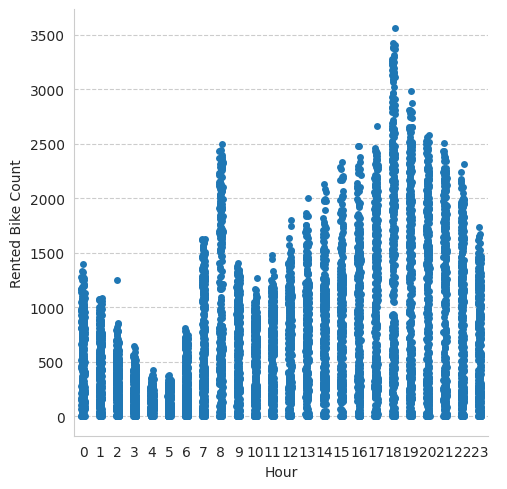

<Figure size 2000x1600 with 0 Axes>

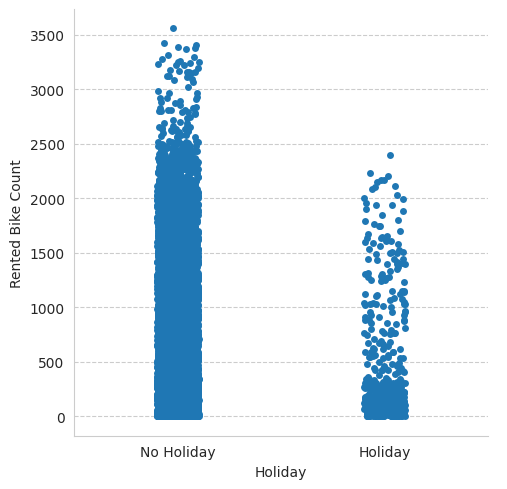

<Figure size 2000x1600 with 0 Axes>

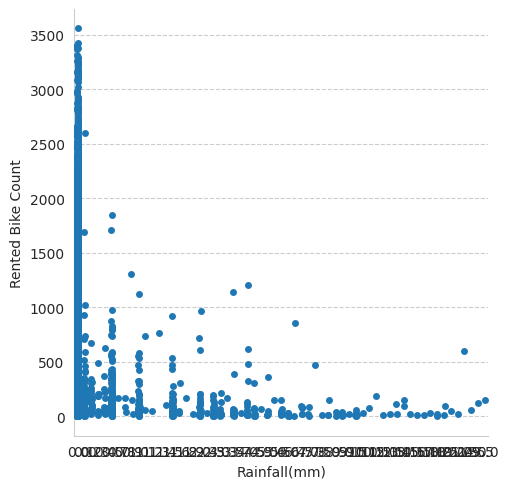

<Figure size 2000x1600 with 0 Axes>

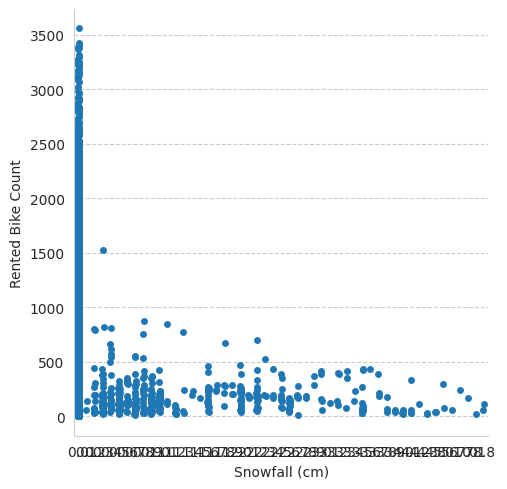

<Figure size 2000x1600 with 0 Axes>

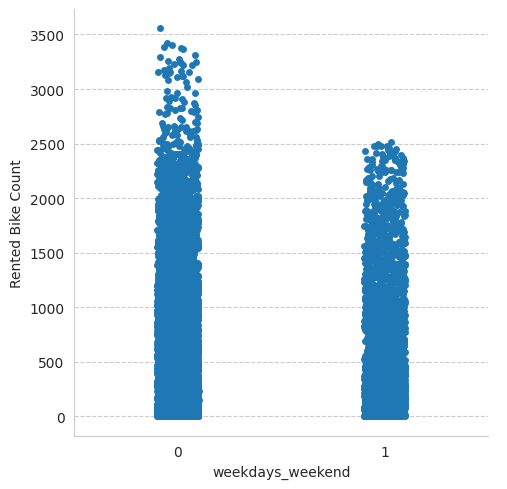

In [68]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df)
  plt.show()


Conclusion:

From hour v/s rented bike

we can clearly see there is high demand of Rented bike between the office hours.
From working-nonworking v/s rented bike

As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day
From Rainfall v/s rented bike

we can see that if Rainfall increase demand of Rented Bike Decreases
From Snowfall v/s rented bike

we can see that if Snowfall increase demand of Rented Bike Decreases

In [70]:
# Date columns to Date format conversion

df['Date']= pd.to_datetime(df['Date'])

In [71]:
df['month'] = df['Date'].apply(lambda x : x.month)

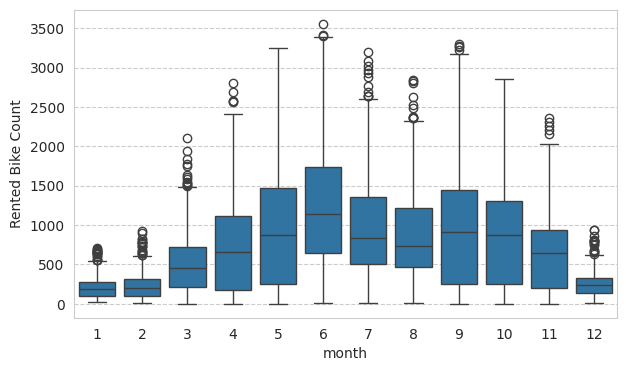

In [72]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()


Conclusion:

we can see that there less demand of Rented bike in the month of December, january,February i.e during winter seasons

Also demand of bike is maximum during May,june,july i.e Summer seasons


# Functions
Creating Function to train linear models and calculate scores

In [3]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]


In [4]:
#making a function to train and evaluate linear model
def train_linear_model(model,X_train,y_train,X_test,y_test):
#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')
  #finding mean_squared_error
  MSE =mean_squared_error(y_test**2,pred**2)
  print("MSE ;",MSE)
  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score

  r2= r2_score(y_test**2,pred**2)
  print("R2 :",r2)

  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2: ",adj_r2)

  print('\n================Evalution Matrix=========================\n')
#appending matrix to list
  mean_sq_error.append(MSE)

  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

    # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()





Funtion to run model

In [49]:
def run_model(model,X_train,y_train,X_test,y_test):

    # Fit Model
    model.fit(X_train,y_train)

    # Get Metrics

    preds = model.predict(X_test)

    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)

    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

     #ploting
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n')
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()


Creating function to get feature importance


In [5]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)),importances[indices],color='red',align='center')
  plt.yticks(range(len(indices)),[features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()


In [6]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=78ed005838709bb4be7166ab5adac64db2a56788c2576823432ce11503c318b5
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [7]:
#LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):

  #variable to store Varables
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)

  X=X_test
  feature_names = list(X_test.columns)
  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  #selecting the instance to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance,model.predict,num_features=num_features)
  exp.show_in_notebook(show_table=True)


# Train | Test Split for LR

In [20]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [21]:
X.shape

(8760, 378)

In [24]:
y=np.sqrt(final_df['Rented Bike Count'])

In [26]:
#splitting

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)


In [27]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
#linear regression model

linear_model = LinearRegression()



================Evalution Matrix=========================

MSE ; 127967.15686316724
RMSE : 357.724973776178
R2 : 0.6887452916172279
Adjusted R2:  0.6237788201822815

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



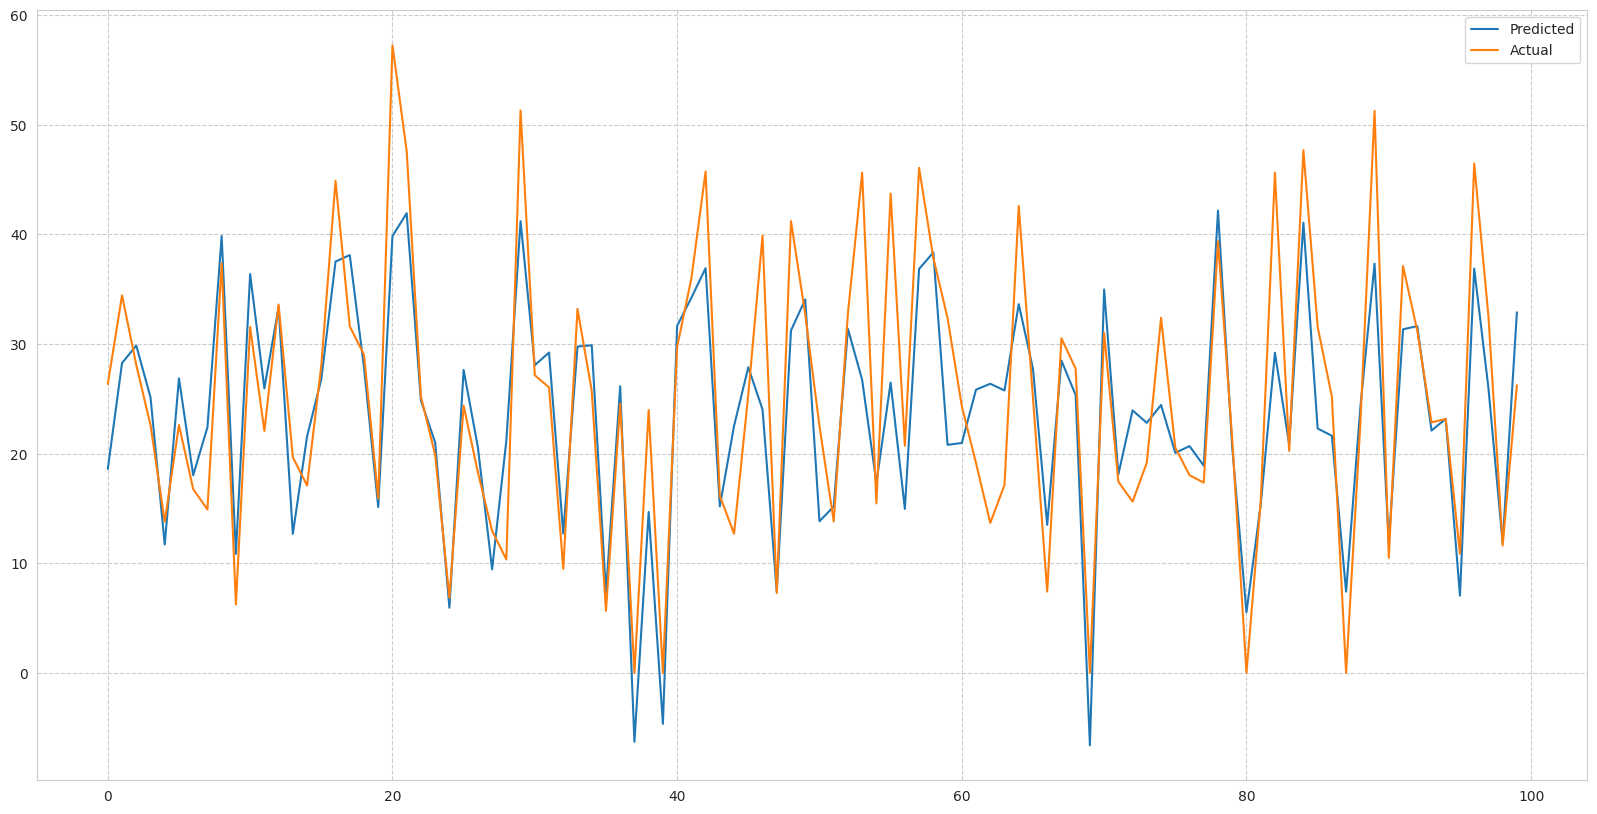

In [30]:
train_linear_model(linear_model,X_train,y_train,X_test,y_test)


# Regularisation

In [32]:

from sklearn.linear_model import Lasso

Lasso Regression

In [33]:
#finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE ; 128508.16858432657
RMSE : 358.4803601096252
R2 : 0.6874293879929787
Adjusted R2:  0.6221882552825126

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



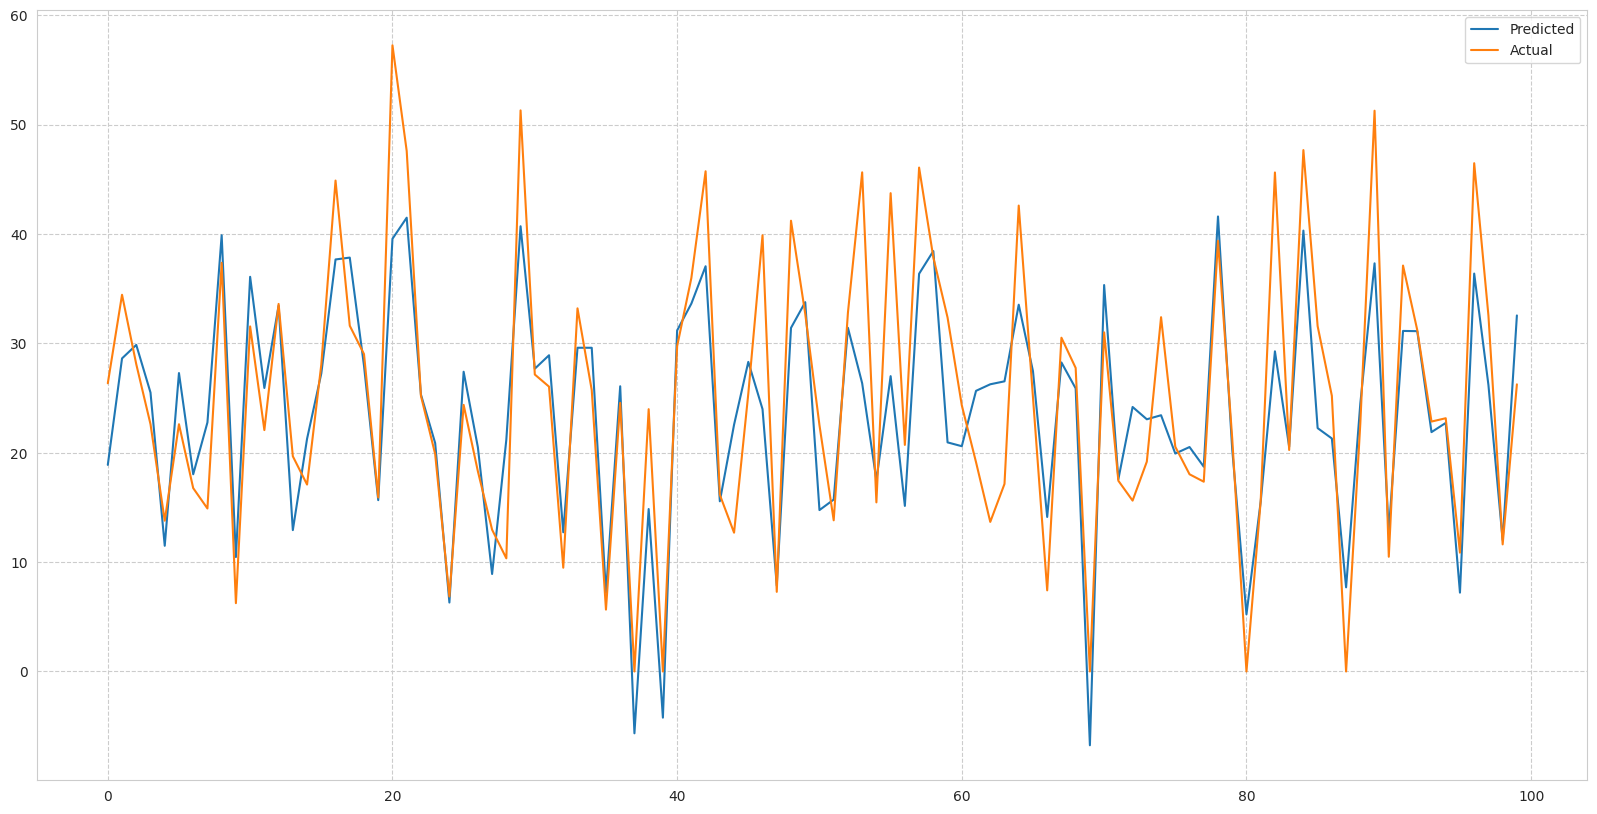

In [34]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

# Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE ; 128309.49237954908
RMSE : 358.20314401125665
R2 : 0.6879126284251056
Adjusted R2:  0.6227723598136699

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



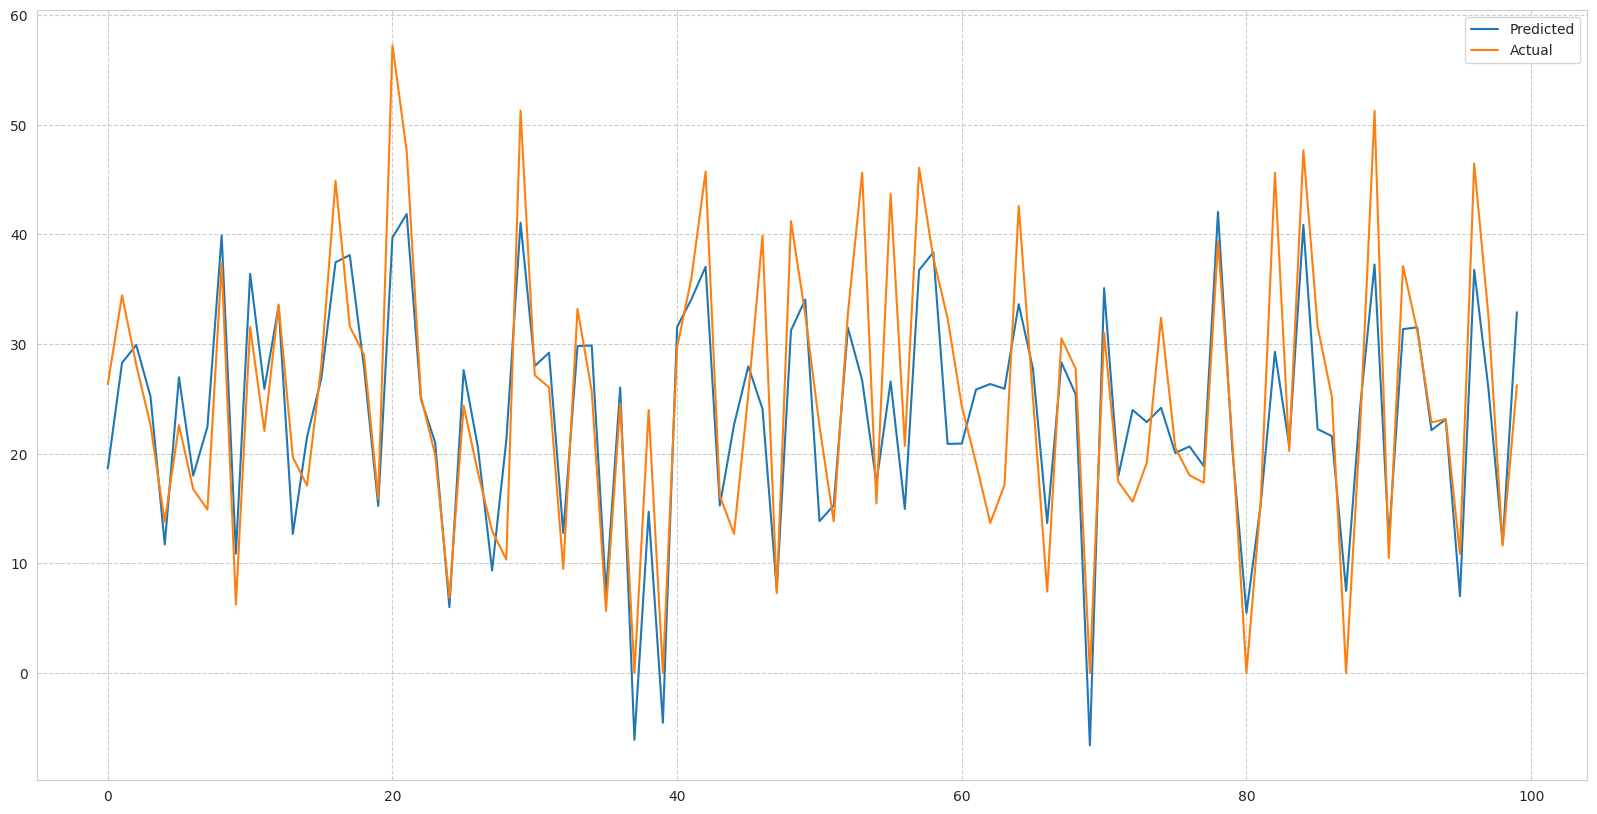

In [36]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

# ElasticNet Regression

In [37]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE ; 128096.90089089617
RMSE : 357.90627389149824
R2 : 0.688429715023162
Adjusted R2:  0.6233973750335182

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



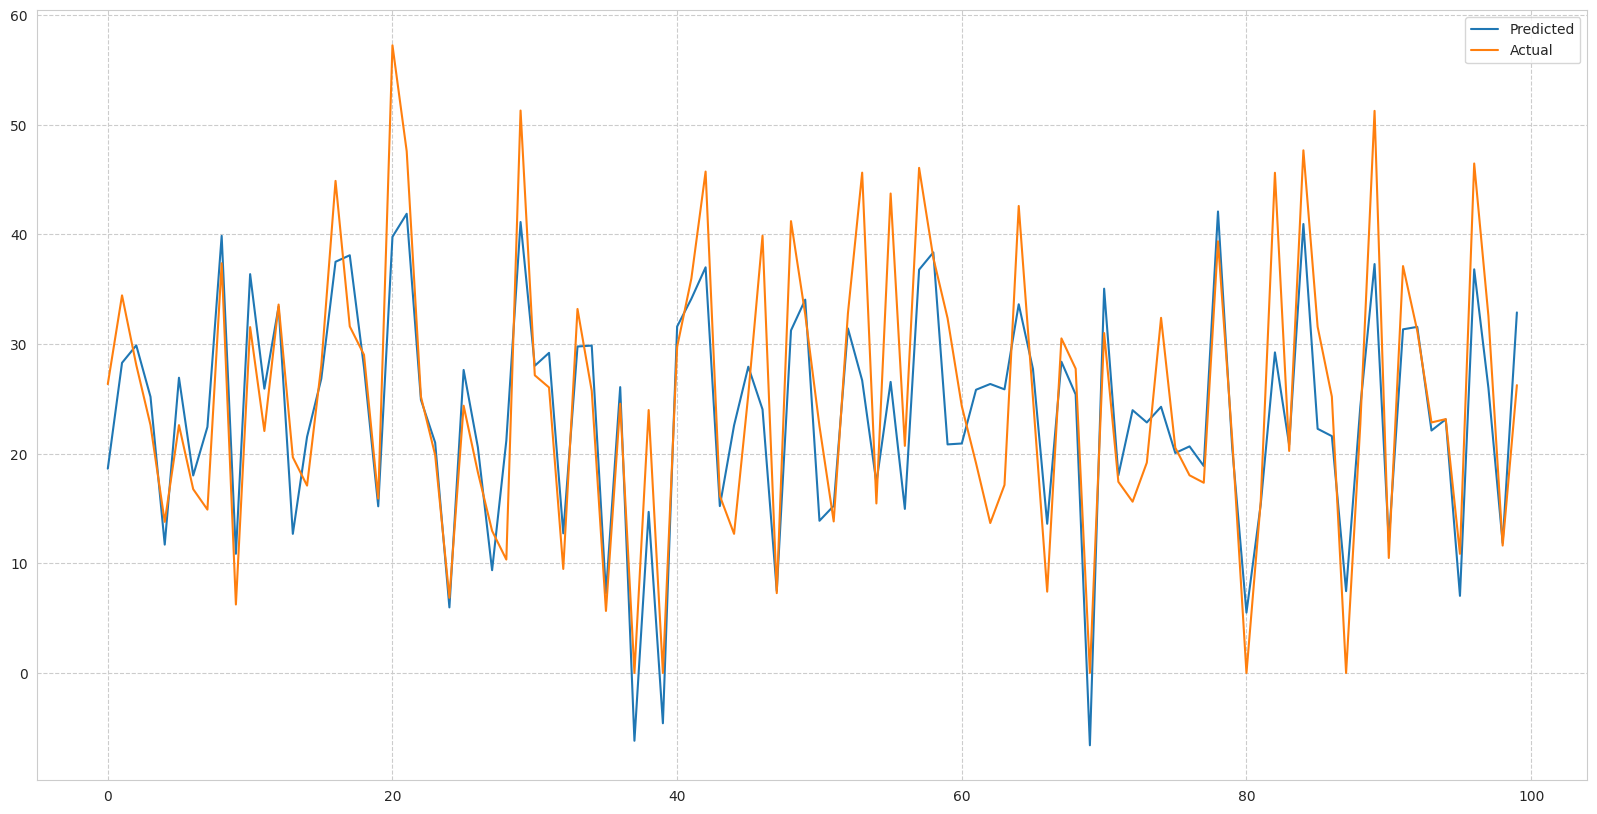

In [38]:

# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)


# Polynomial Regression

In [39]:

#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [40]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE ; 6207597.578430462
RMSE : 2491.505082962999
R2 : -14.098748939917286
Adjusted R2:  -17.250227183588592

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



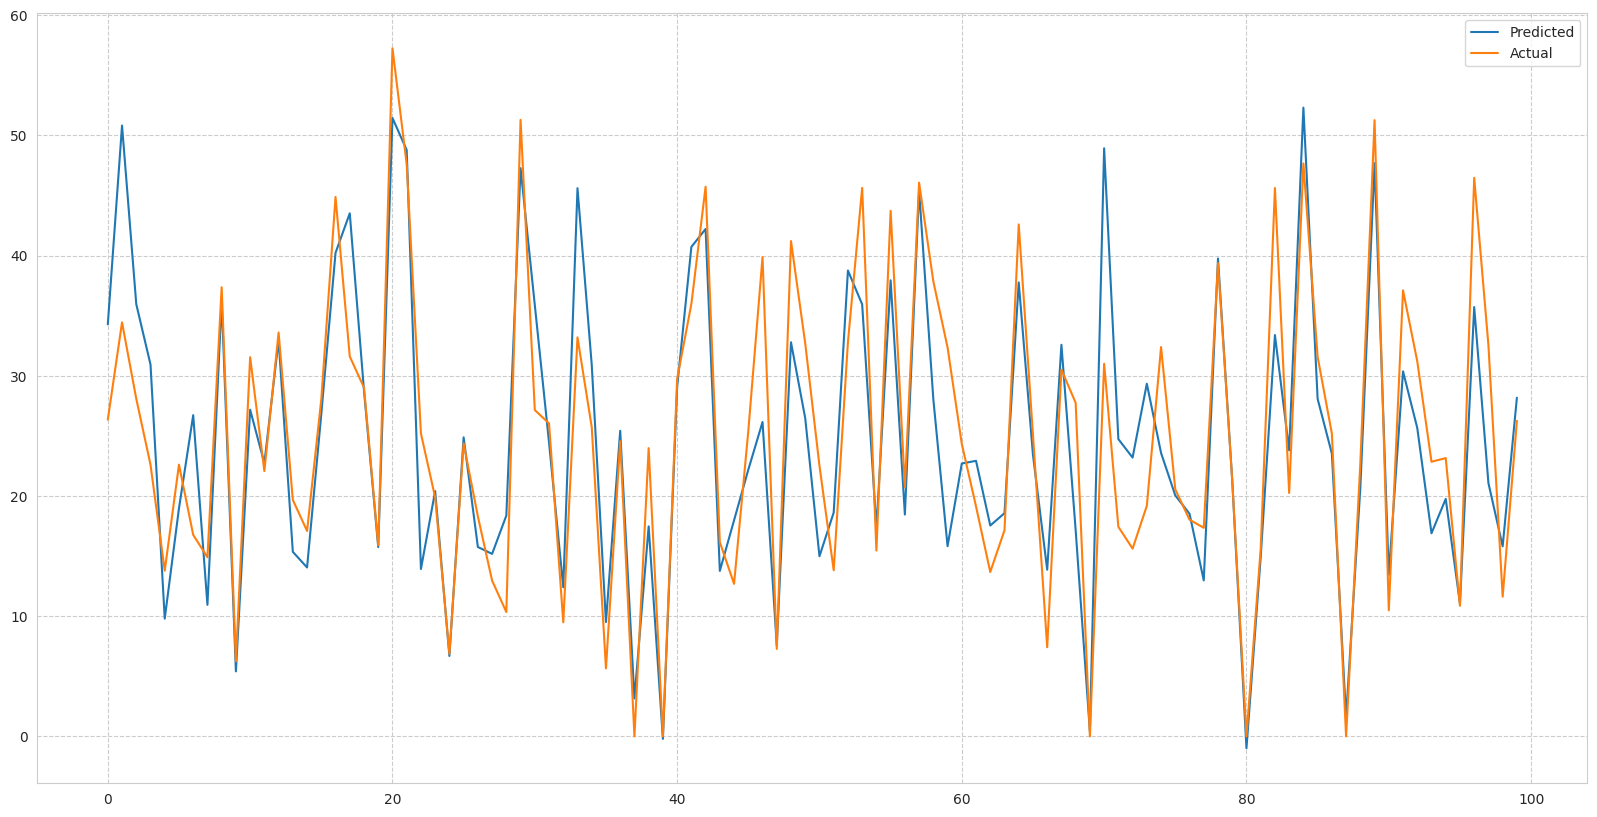

In [41]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

# KNN and Tree Based Method
# Train | Test split Data For Tree based methods

In [42]:
#creatin X for independent variable
X=final_df.drop(['Rented Bike Count'],axis=1)

In [43]:
#creating y for dependent variable
y=final_df['Rented Bike Count']

In [44]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# KNN Regression

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [46]:
#creating model
scaler = MinMaxScaler()

In [47]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 109568.4856418062
RMSE : 331.01130742288274
R2 : 0.7322379707237852
Adjusted R2 :  0.6763494853199148

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



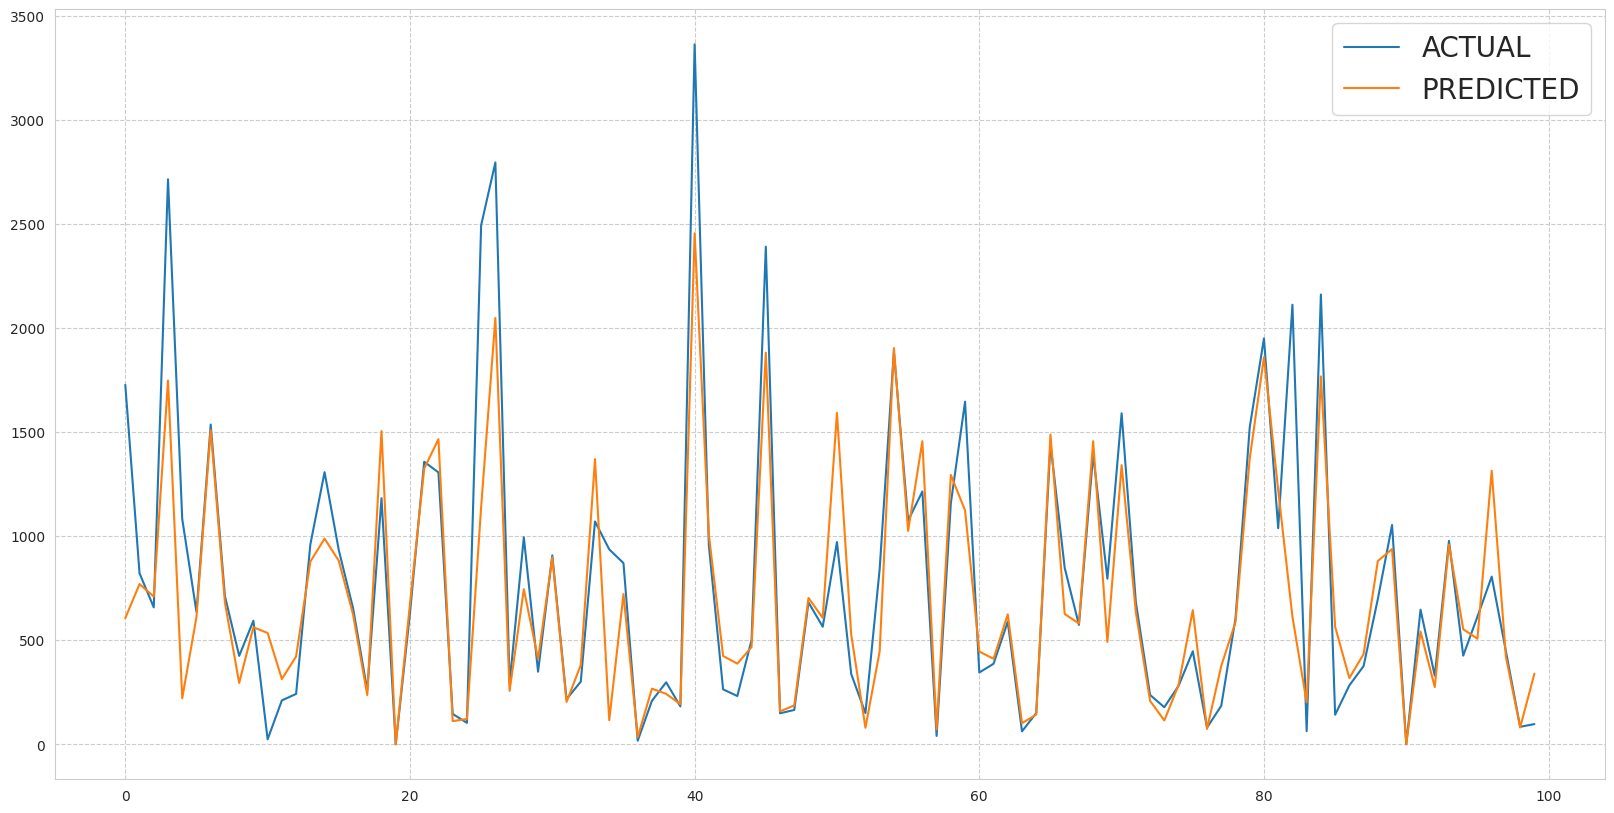

In [50]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

# Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 102515.1095890411
RMSE : 320.1798082156979
R2 : 0.7494749186844498
Adjusted R2 :  0.6971842059636999

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



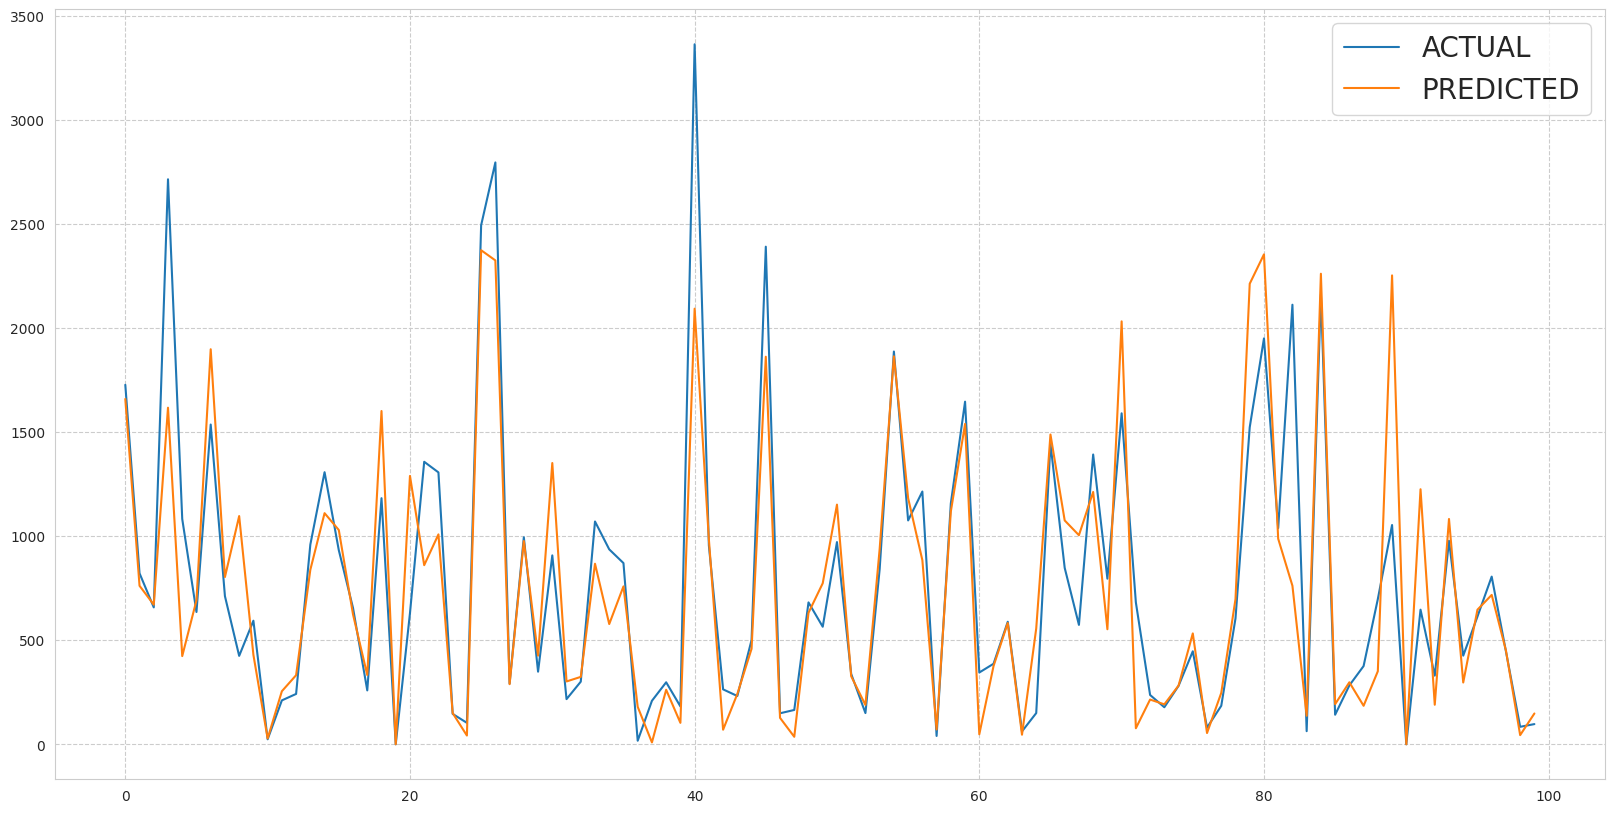

In [52]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

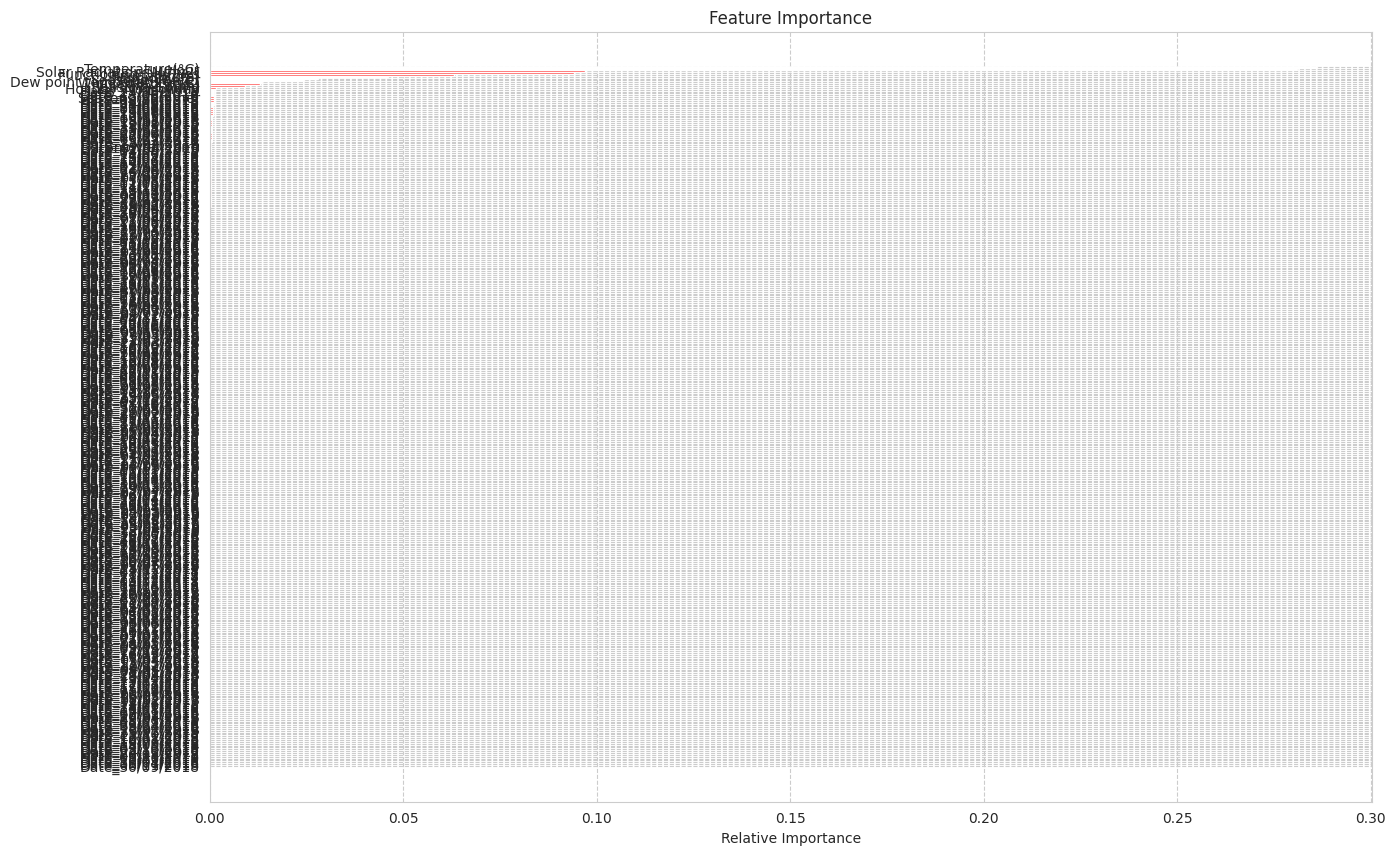

In [53]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

# Random Forest

In [54]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [55]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [56]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [57]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 68017.40661573608
RMSE : 260.8014697346165
R2 : 0.8337799531055498
Adjusted R2 :  0.7990857633064873

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



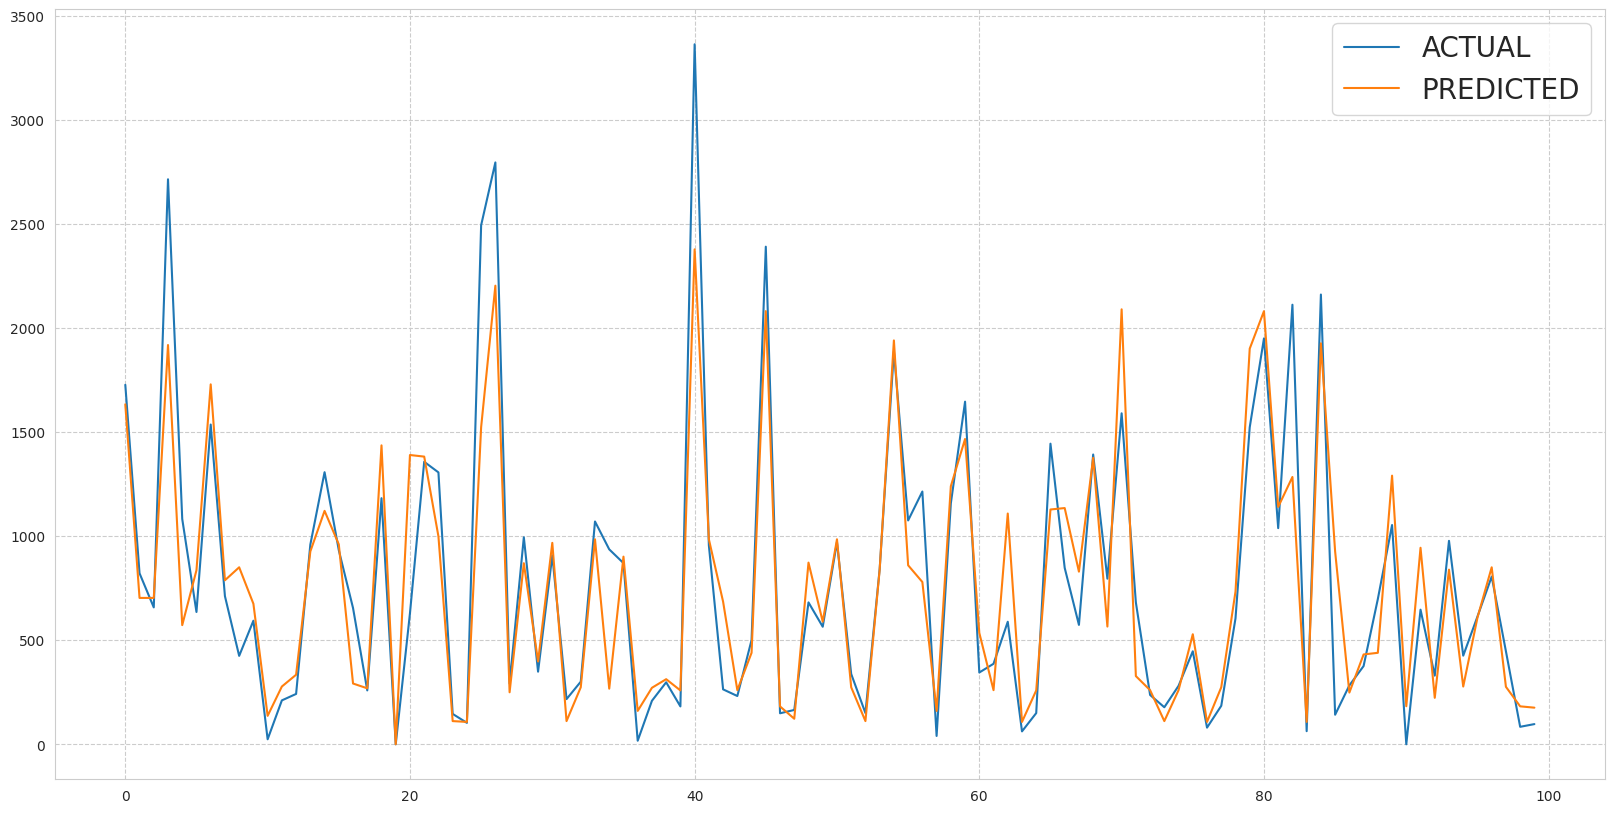

In [58]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [59]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

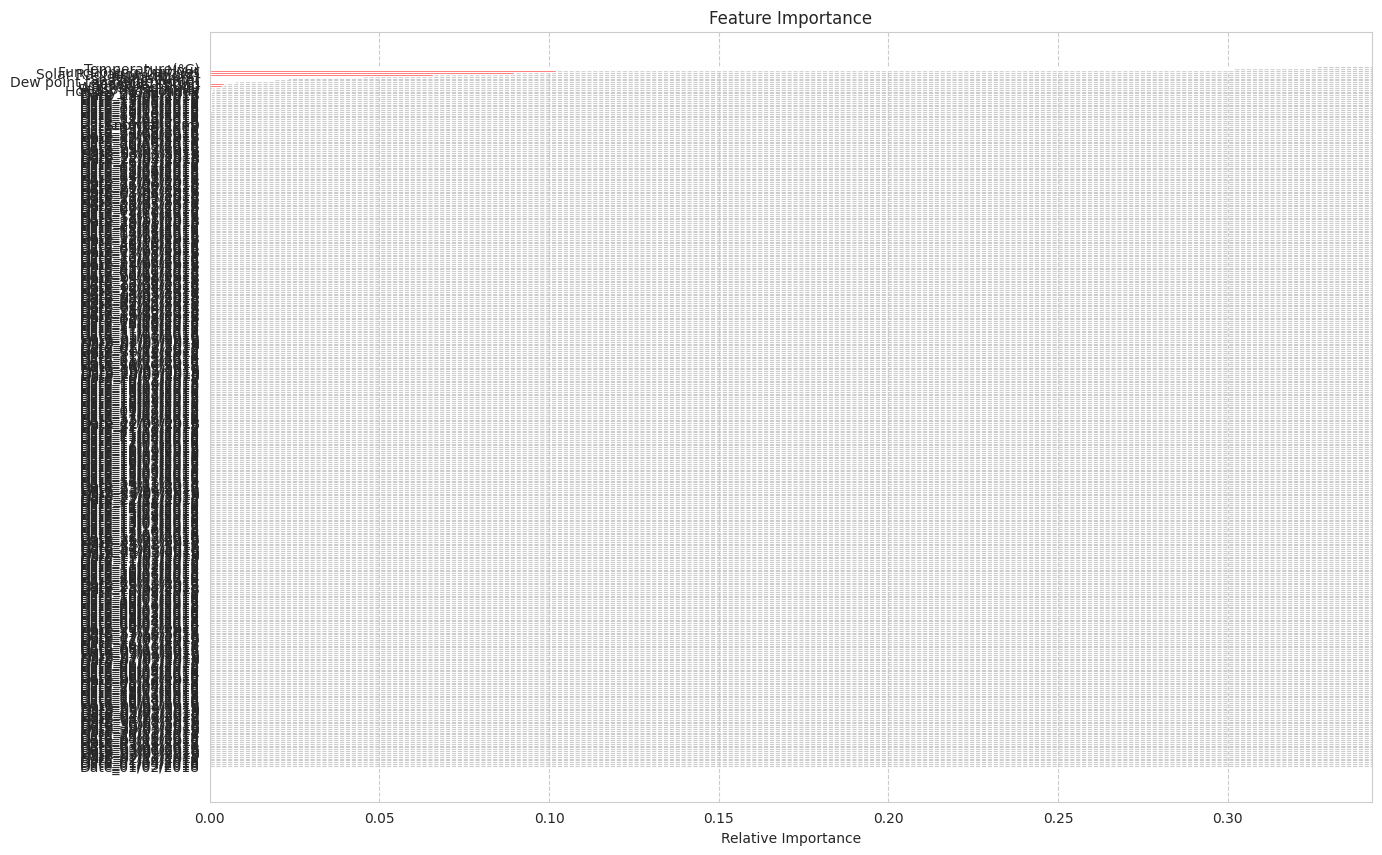

In [60]:

#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

# Gradient Boosting

In [61]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [63]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [64]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 61638.35882484192
RMSE : 248.27073694827973
R2 : 0.8493689864971736
Adjusted R2 :  0.8179286093000072

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



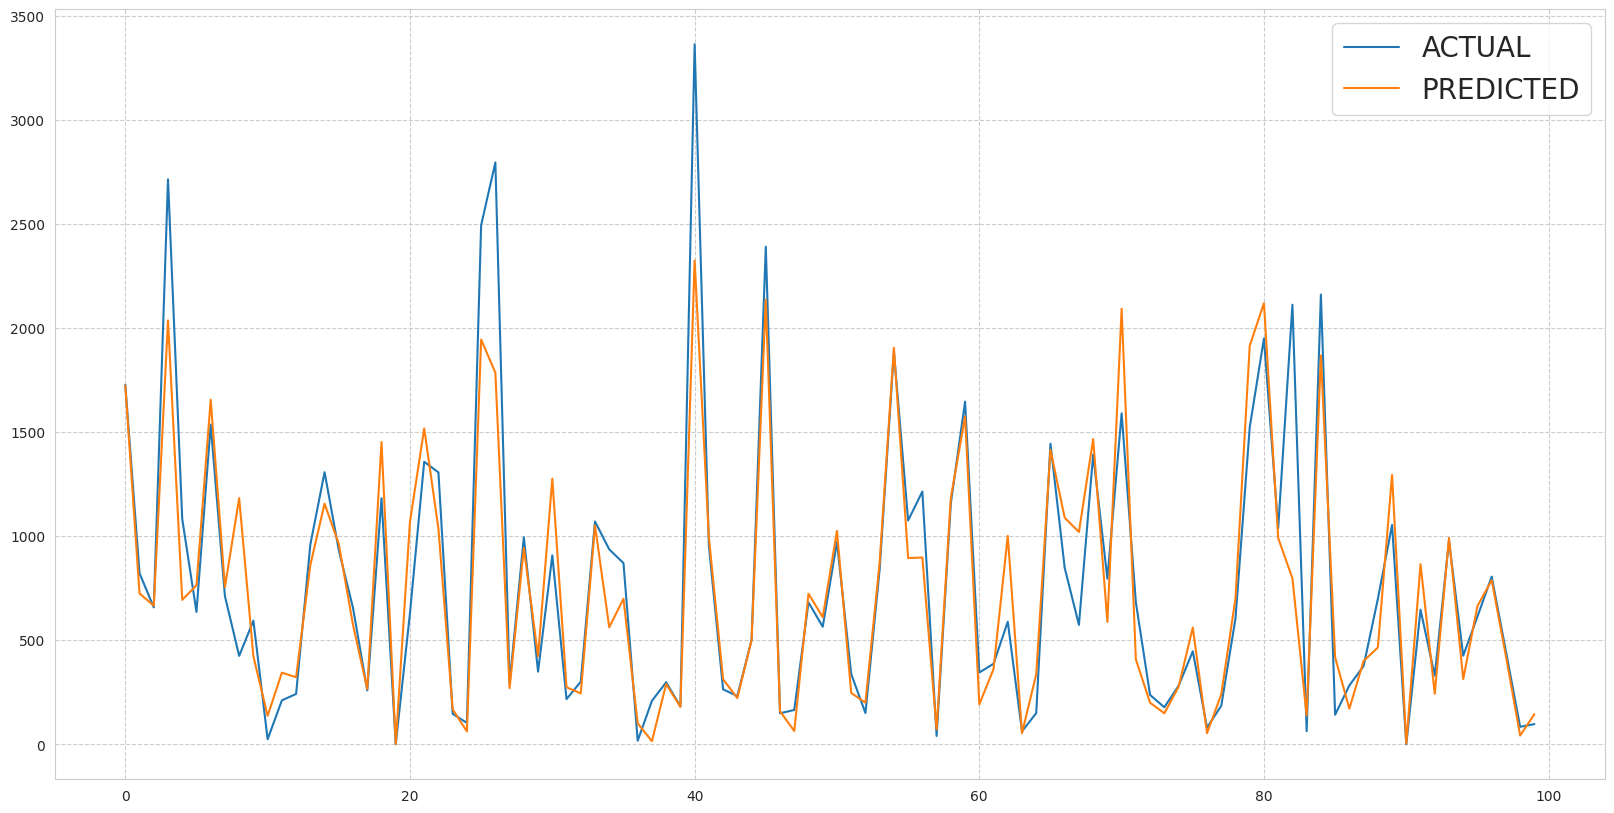

In [65]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [66]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

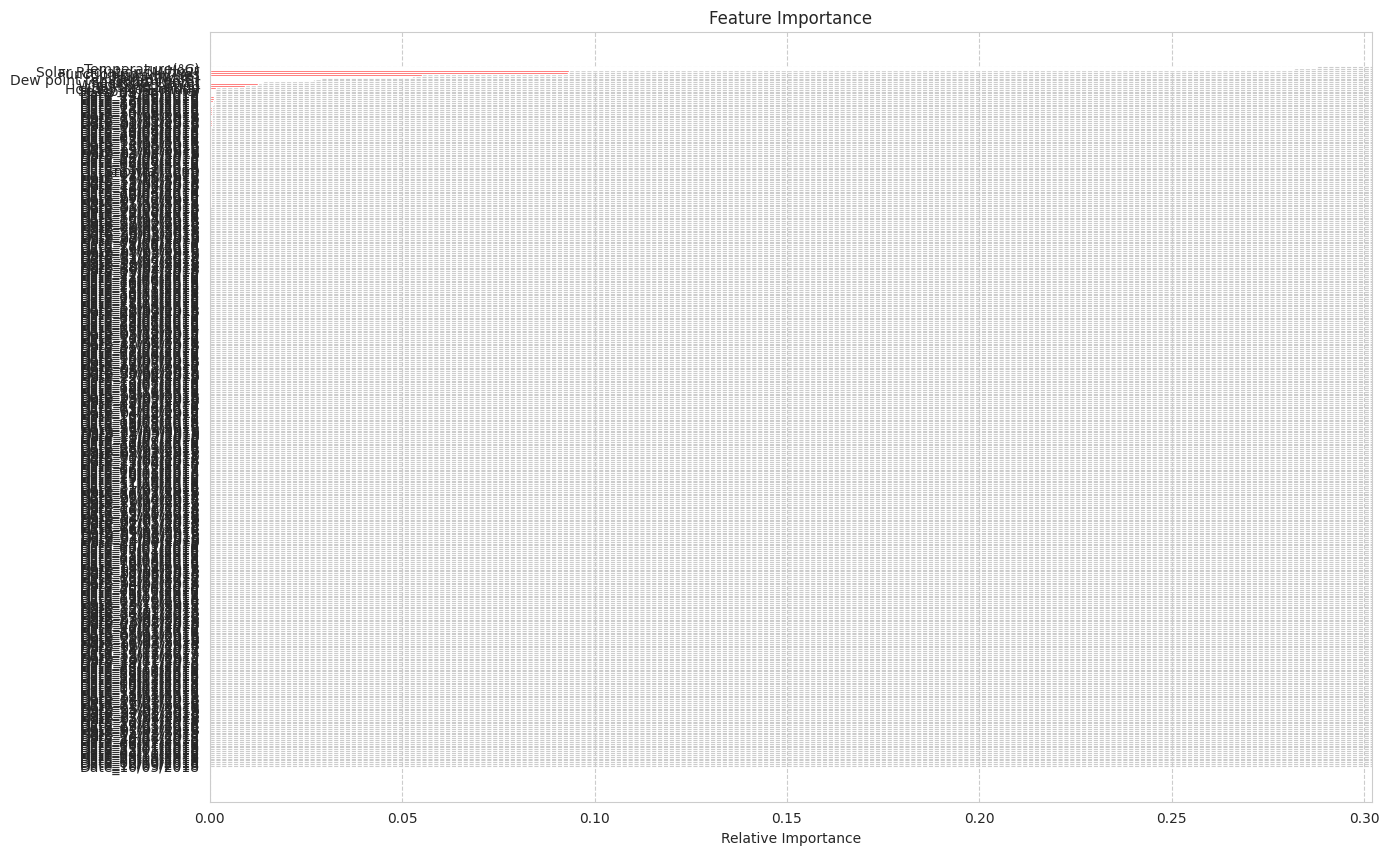

In [67]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

# eXtreme Gradient Boosting

In [68]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [69]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [70]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [71]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 51044.5
RMSE : 225.9302989862139
R2 : 0.8752580881118774
Adjusted R2 :  0.849221399711154

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



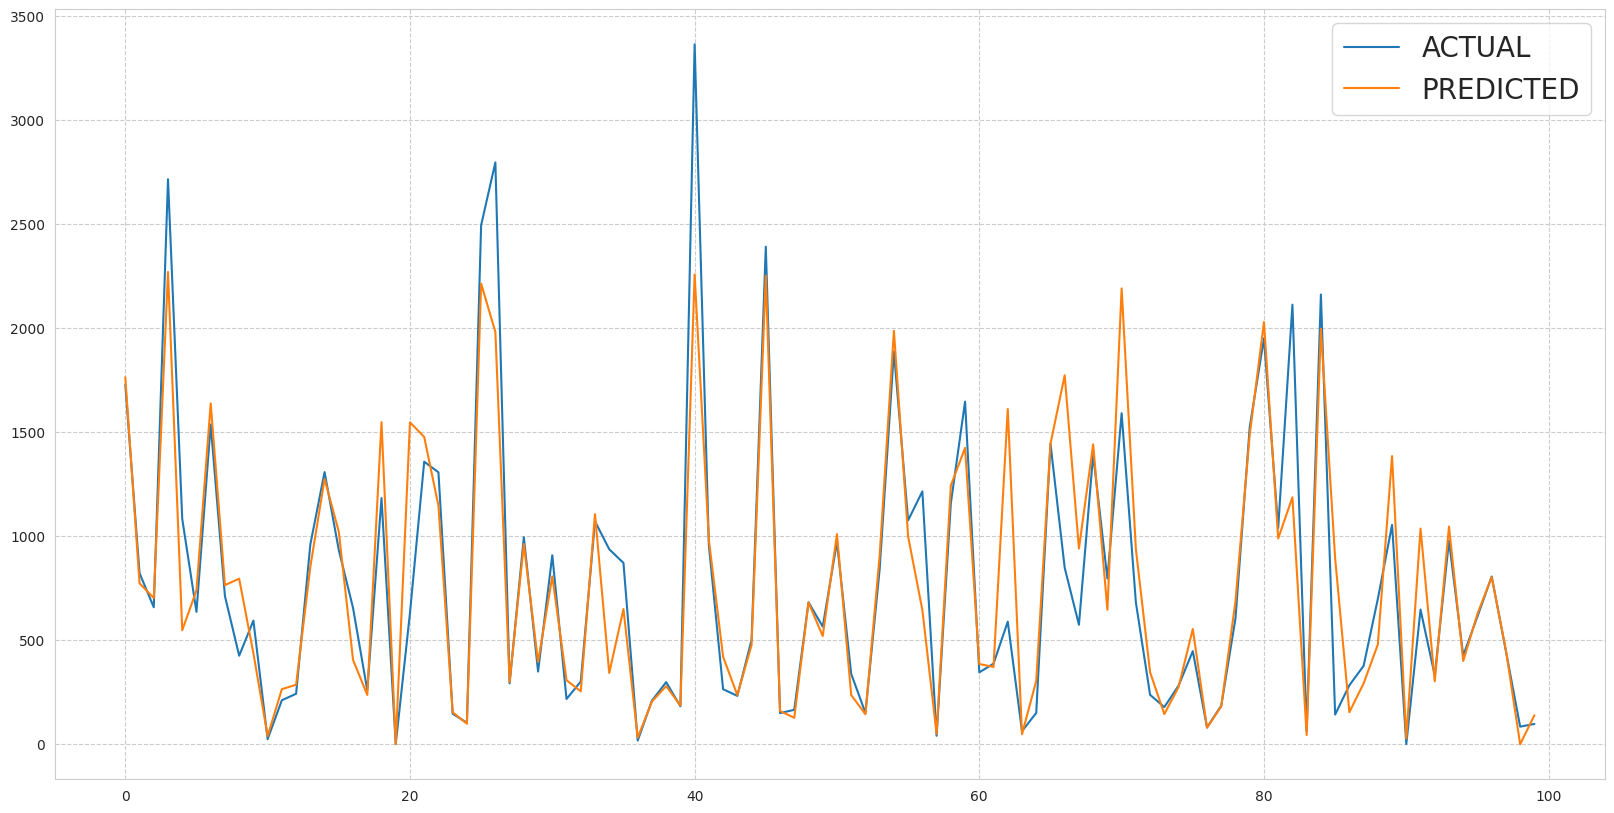

In [72]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [73]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

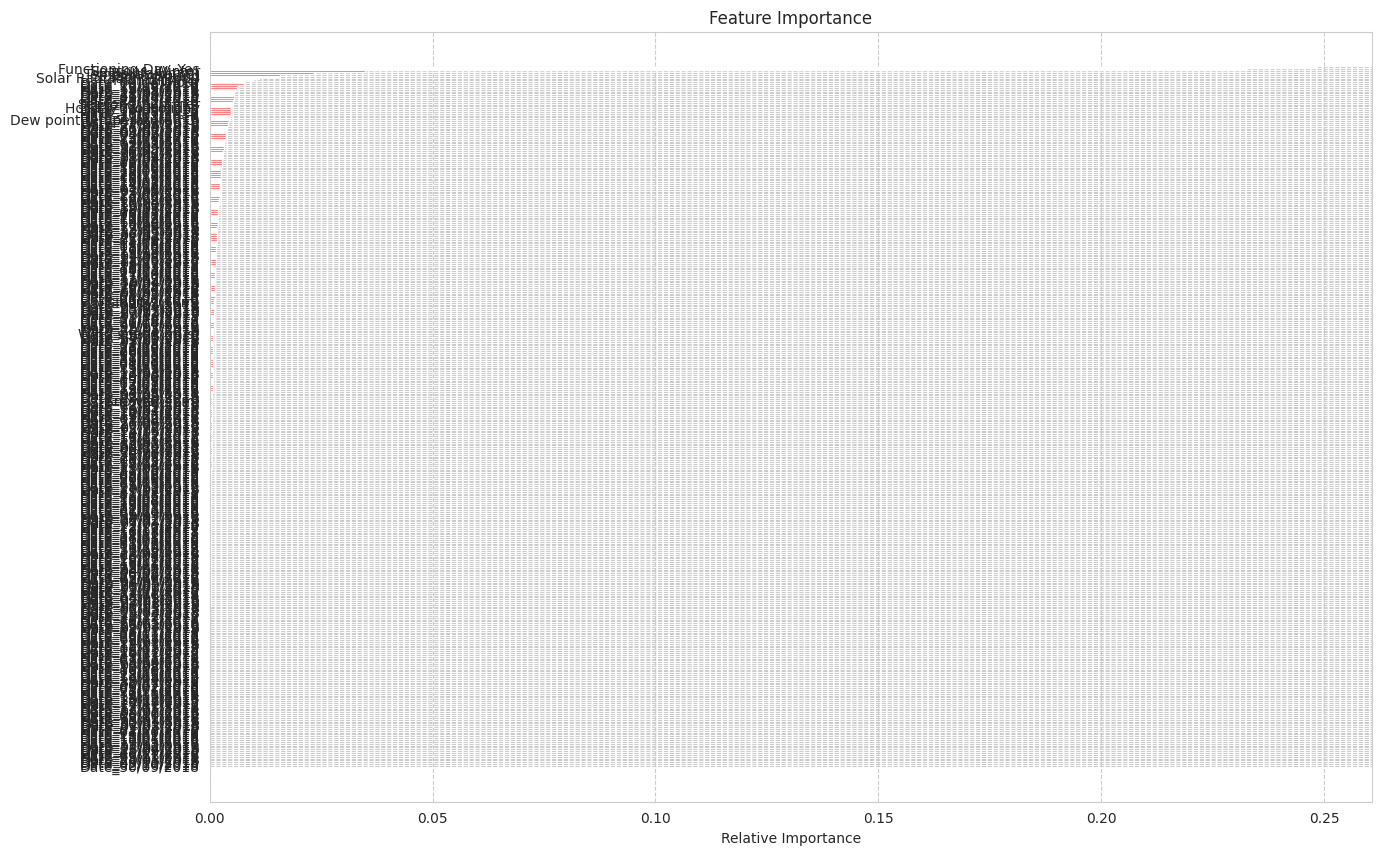

In [74]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

# CatBoost

In [75]:
#installing catboost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


In [76]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [77]:
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)


================Evalution Matrix=========================

MSE : 43554.773426178836
RMSE : 208.6978040760823
R2 : 0.8935614155024005
Adjusted R2 :  0.871345079257181

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



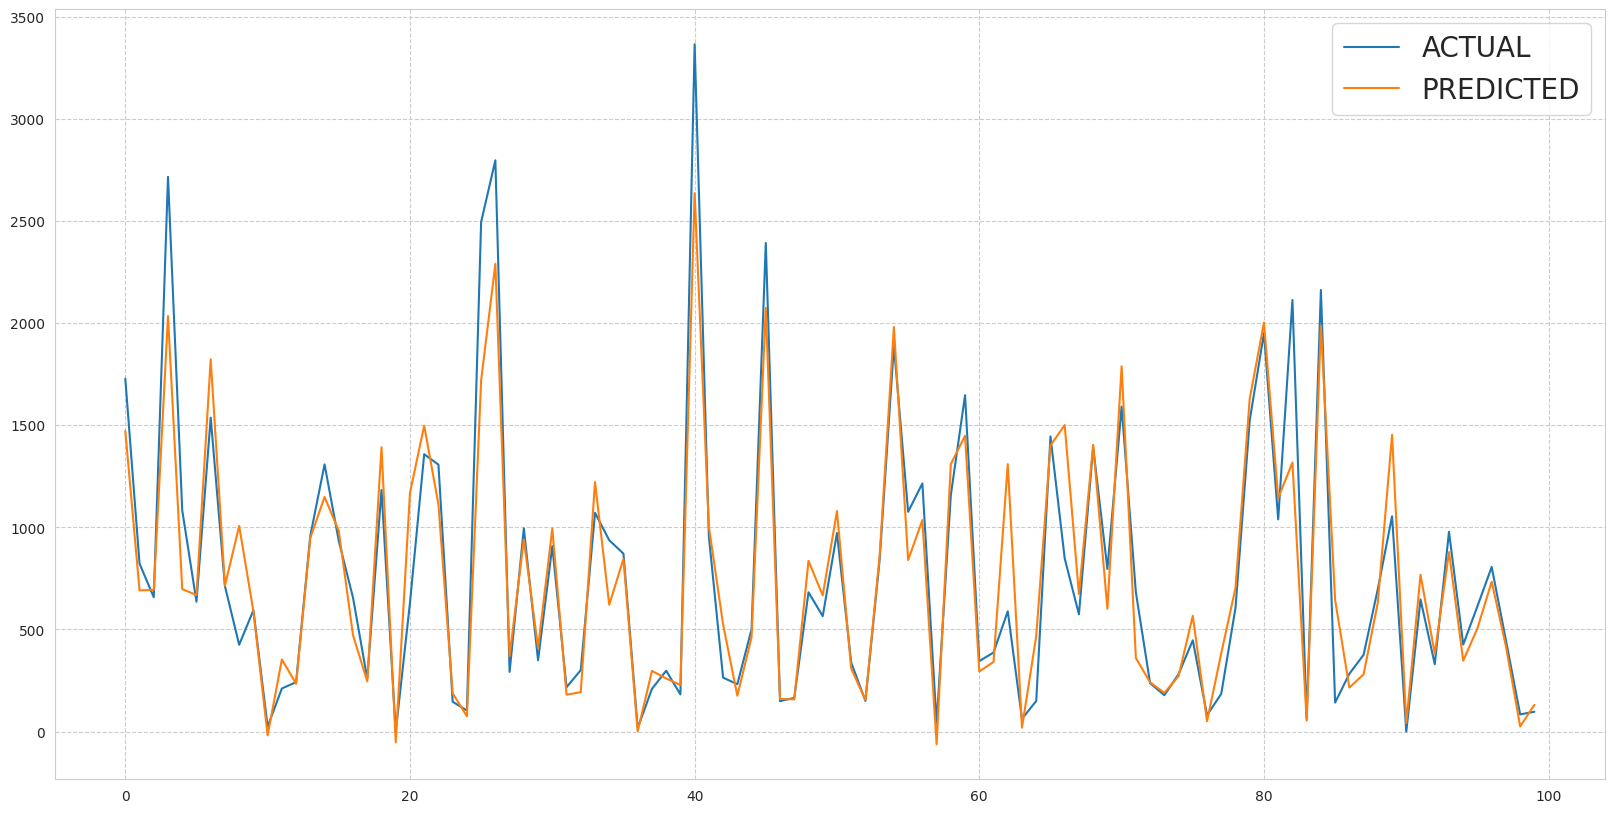

In [78]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [79]:
#checking params of cat boost model
cb_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'lear

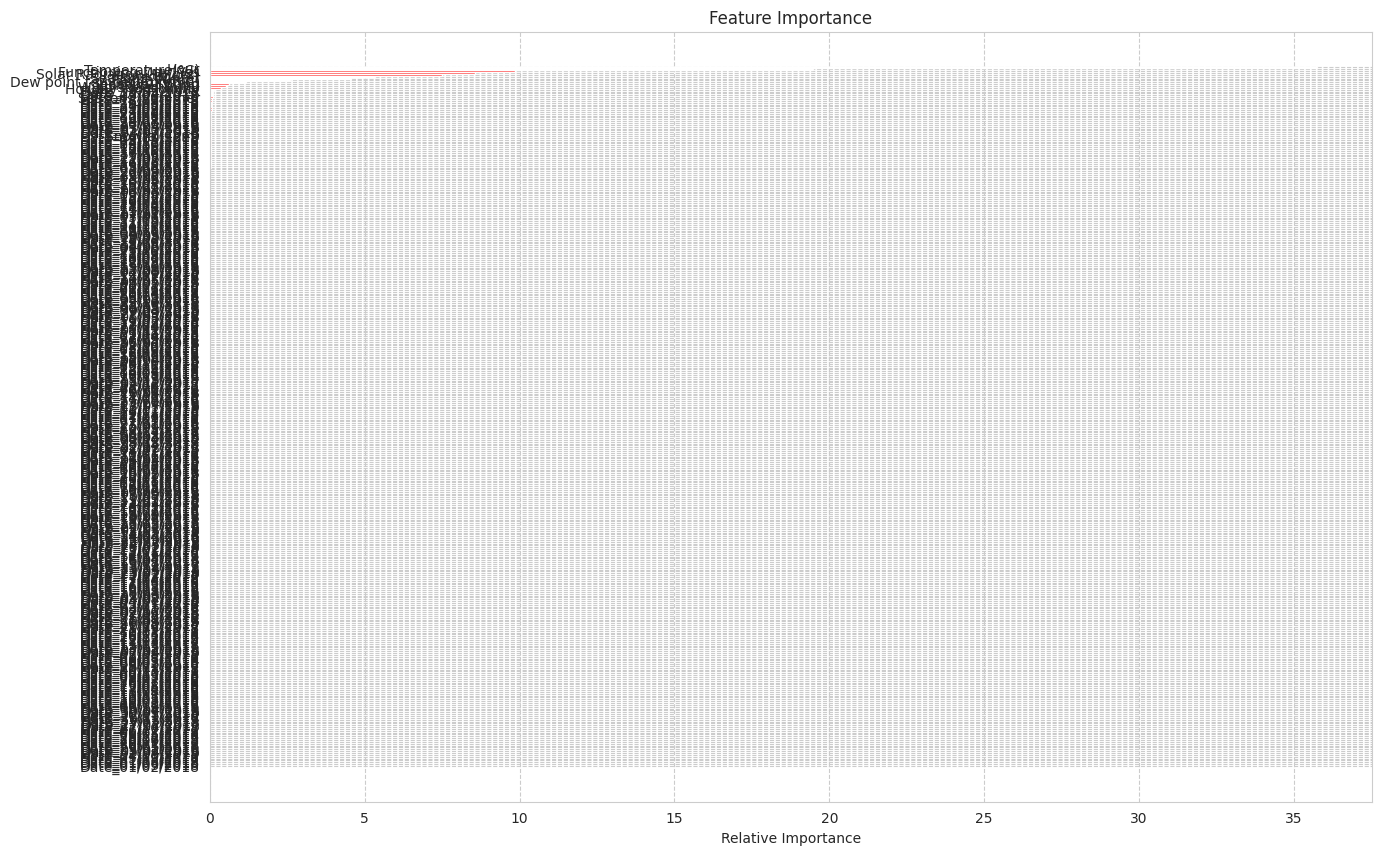

In [80]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_train)

# LightGBM

In [81]:
import lightgbm as lgb

In [82]:
lgbr = lgb.LGBMRegressor()

In [83]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 6570, number of used features: 106
[LightGBM] [Info] Start training from score 705.796347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

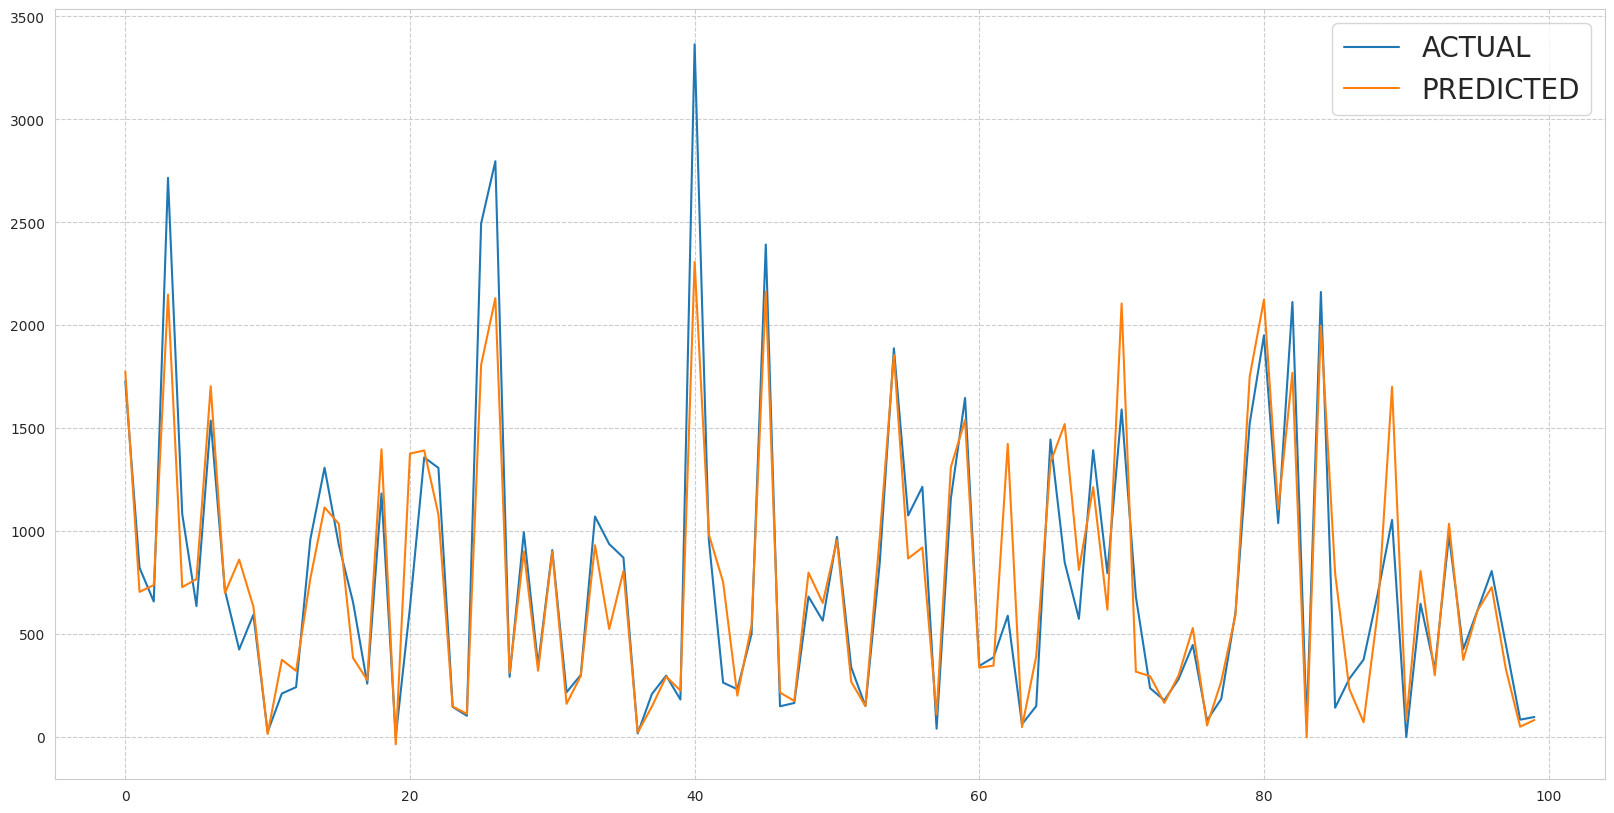

In [84]:
#calling run_model to train,fit and evalution of catboost model
run_model(lgbr_grid,X_train,y_train,X_test,y_test)

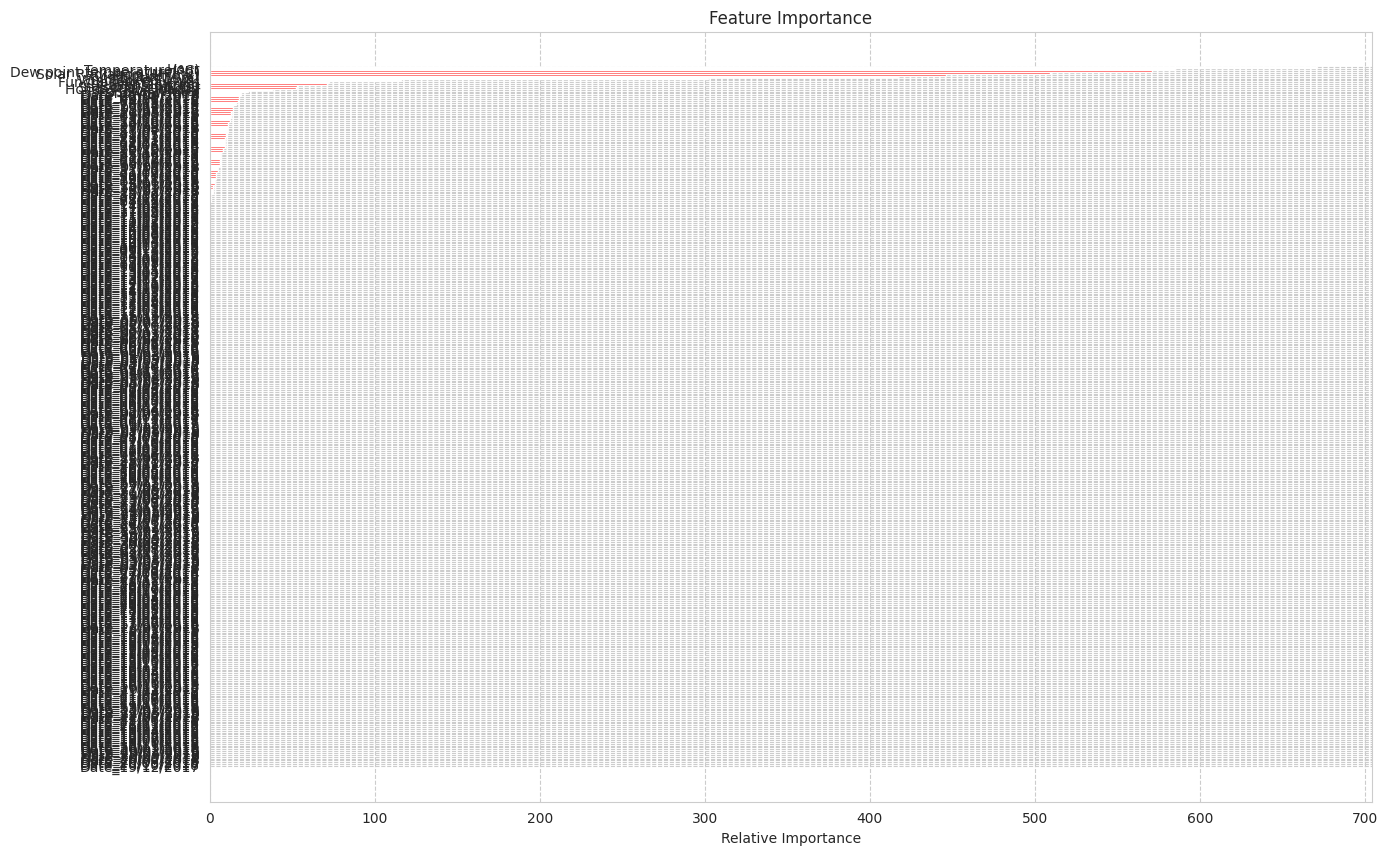

In [85]:
#getting and visualizing features importance of catboost model
get_features_importance(lgbr_grid.best_estimator_,X_train)

# Combined Evaluation Matrix of All the models

In [86]:
#creating dictionary to store all the metrices
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [87]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost','lightGBM']

In [88]:
#converting dictionary to dataframe for easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [89]:
matrices_df

Linear          Lasso          Ridge  \
Mean_square_error       127967.156863  128508.168584  128309.492380   
Root_Mean_square_error     357.724974     358.480360     358.203144   
R2                           0.688745       0.687429       0.687913   
Adjusted_R2                  0.623779       0.622188       0.622772   

                           Elasticnet    Polynomial  K-Nearyest_Neighbor  \
Mean_square_error       128096.900891  6.207598e+06        109568.485642   
Root_Mean_square_error     357.906274  2.491505e+03           331.011307   
R2                           0.688430 -1.409875e+01             0.732238   
Adjusted_R2                  0.623397 -1.725023e+01             0.676349   

                        Decision_Tree  Random_Forest  Gradient_Boosting  \
Mean_square_error       102515.109589   68017.406616       61638.358825   
Root_Mean_square_error     320.179808     260.801470         248.270737   
R2                           0.749475       0.833780           0.849369   
Adjusted_R2                  0.697184       0.799086           0.817929   

                           Xtreme_GB      CATBoost      lightGBM  
Mean_square_error       51044.500000  43554.773426  50860.706901  
Root_Mean_square_error    225.930299    208.697804    225.523185  
R2                          0.875258      0.893561      0.875707  
Adjusted_R2                 0.849221      0.871345      0.849764

In [90]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [91]:
final_matrices

Models  Mean_square_error  Root_Mean_square_error         R2  \
0                Linear       1.279672e+05              357.724974   0.688745   
1                 Lasso       1.285082e+05              358.480360   0.687429   
2                 Ridge       1.283095e+05              358.203144   0.687913   
3            Elasticnet       1.280969e+05              357.906274   0.688430   
4            Polynomial       6.207598e+06             2491.505083 -14.098749   
5   K-Nearyest_Neighbor       1.095685e+05              331.011307   0.732238   
6         Decision_Tree       1.025151e+05              320.179808   0.749475   
7         Random_Forest       6.801741e+04              260.801470   0.833780   
8     Gradient_Boosting       6.163836e+04              248.270737   0.849369   
9             Xtreme_GB       5.104450e+04              225.930299   0.875258   
10             CATBoost       4.355477e+04              208.697804   0.893561   
11             lightGBM       5.086071e+04              225.523185   0.875707   

    Adjusted_R2  
0      0.623779  
1      0.622188  
2      0.622772  
3      0.623397  
4    -17.250227  
5      0.676349  
6      0.697184  
7      0.799086  
8      0.817929  
9      0.849221  
10     0.871345  
11     0.849764

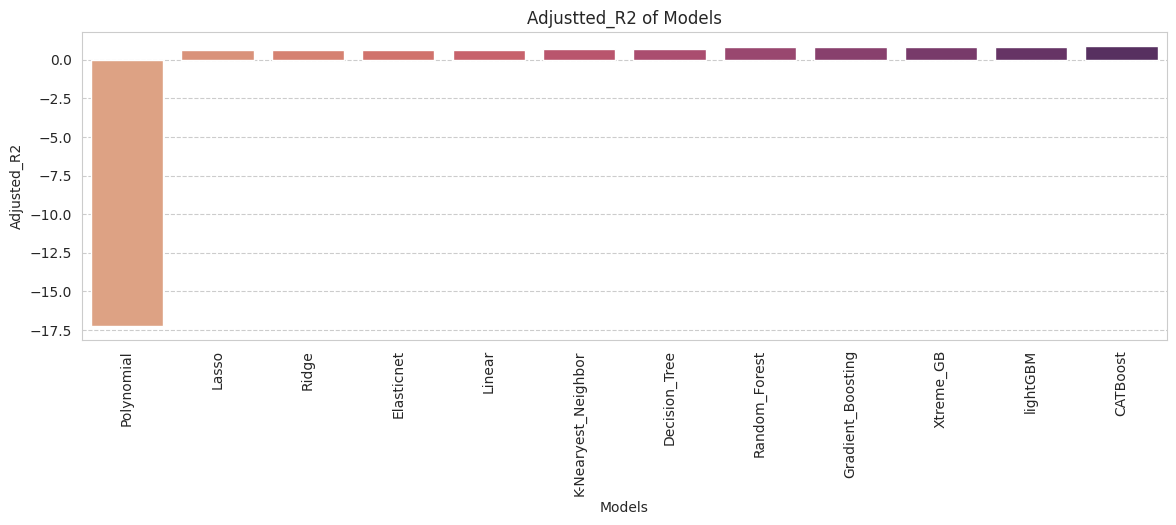

In [92]:
#creating bar plot to visualize the Adjusted R2 of model
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

# Model Explainibility

# SHAP

In [93]:
from sklearn.tree import export_graphviz
import shap
sns.set_style('darkgrid')

In [94]:
for_instance=2

In [95]:
# shape for xgboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [96]:
#shape for catboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(cb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])


In [97]:
#shap for lightGBM model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(lgbr_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

# ELI5

In [98]:
pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.4 MB/s eta 0:00:00


In [99]:
import eli5 as eli

In [100]:
feature_names=list(X_test.columns)

In [101]:
for_instance=2

In [105]:

#eli5 for lgbr model
eli.show_prediction(lgbr_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

The green color shows how much the feature contributes to the prediction of the respective class and the weights are positive for the green color.

The red color has negative weights that indicate the feature isn't contributing to the prediction of that class.

It can be observed from the above output, eli5 shows us the contribution of each feature in predicting the output.

# Final Conclusion:
1.In holiday or non-working days there is demands in rented bikes.

2.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

3.People prefered more rented bikes in the morning than the evening.

4.When the rainfall was less, people have booked more bikes except some few cases.

7.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

8.After performing the various models the lightGBM and Catboost found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the lightGBM and Catboost models !

9.We can use either lightGBM or catboost model for the bike rental stations.